In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)

# Elenco dei file da leggere
files = [r"C:\Users\milan\OneDrive\Documenti\difensori 2019.xlsx", 
         r"C:\Users\milan\OneDrive\Documenti\difensori_2020.xlsx", 
         r"C:\Users\milan\OneDrive\Documenti\difensori_2021.xlsx",
         r"C:\Users\milan\OneDrive\Documenti\difensori_2022.xlsx", 
         r"C:\Users\milan\OneDrive\Documenti\difensori_2023.xlsx"]

# Faccio un dizionario per mappare i file agli anni
year = { r"C:\Users\milan\OneDrive\Documenti\difensori 2019.xlsx": 2019, 
         r"C:\Users\milan\OneDrive\Documenti\difensori_2020.xlsx": 2020, 
         r"C:\Users\milan\OneDrive\Documenti\difensori_2021.xlsx": 2021,
         r"C:\Users\milan\OneDrive\Documenti\difensori_2022.xlsx":2022, 
         r"C:\Users\milan\OneDrive\Documenti\difensori_2023.xlsx": 2023}
# Questa parte di codice crea 5 figure che rappresentano il riquadro di correlazione fra le statistiche per annata

Questa è la lista completa dei difensori che erano iscritti al campionato di Serie A dal 2019 al 2023 con le rispettive statistiche legate alla loro anagrafe e alle loro prestazioni sul rettangolo di gioco. Tramite questi dati è stato possibile effettuare un'analisi approfondita dei calciatori.


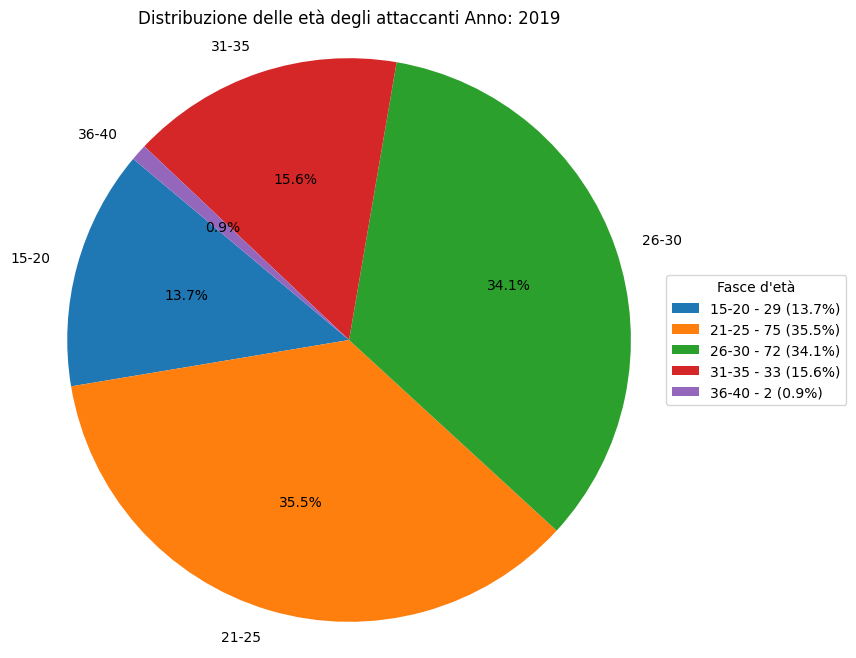

La media dell'età per l'anno 2019 è: 25.62


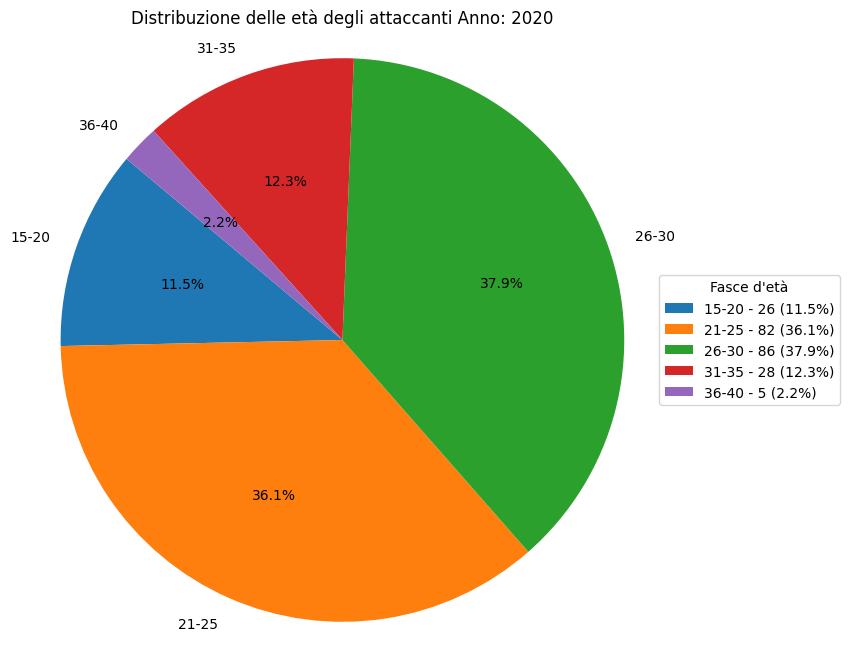

La media dell'età per l'anno 2020 è: 25.81


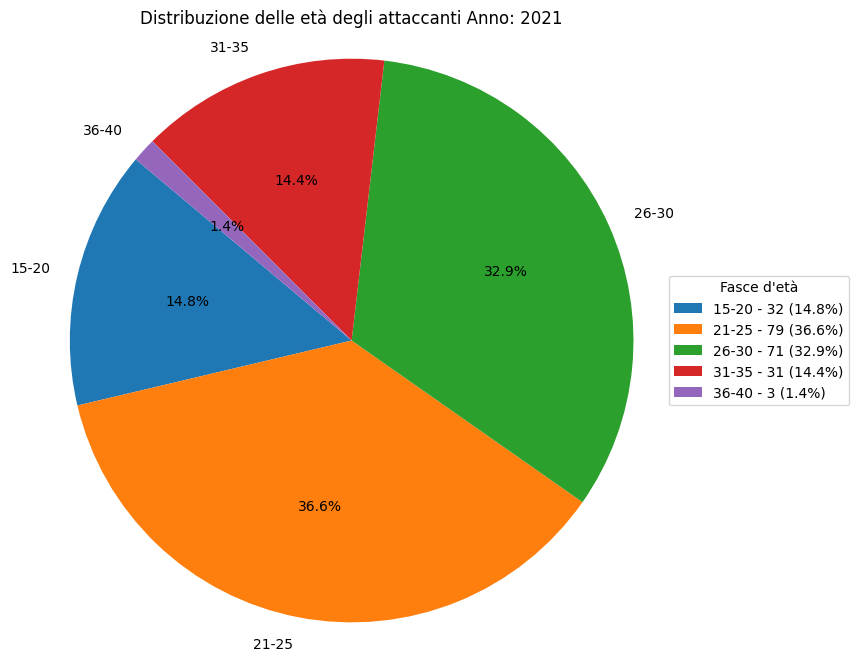

La media dell'età per l'anno 2021 è: 25.50


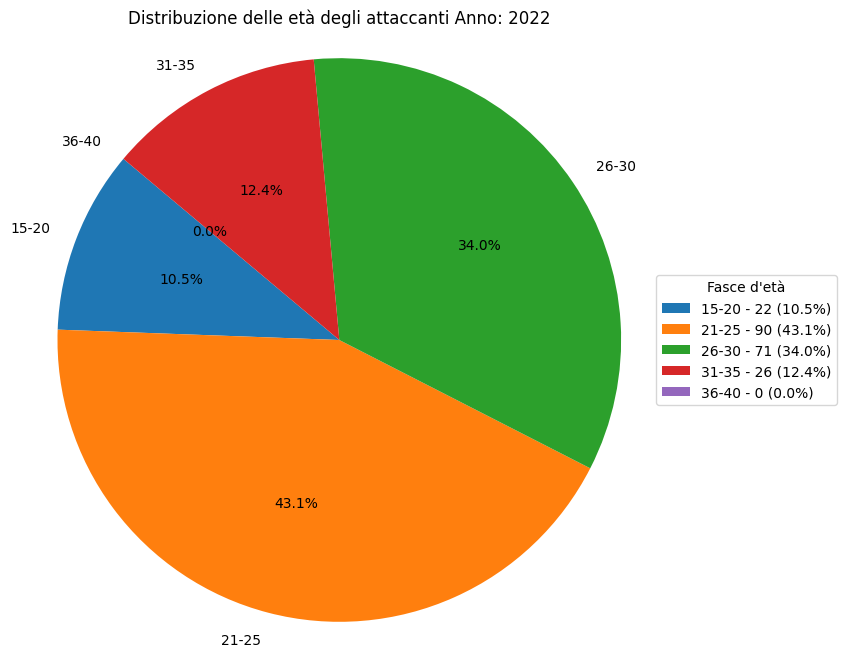

La media dell'età per l'anno 2022 è: 25.47


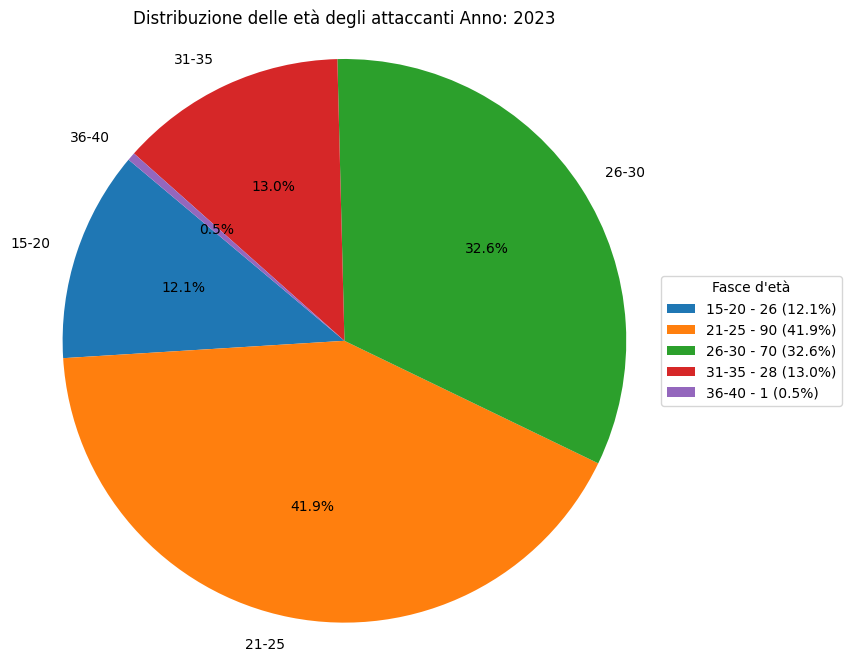

La media dell'età per l'anno 2023 è: 25.45


In [12]:

# Diagrammi a torta

# Definisci le fasce di età
bins = [15, 20, 25, 30, 35, 40]
labels = ['15-20', '21-25', '26-30', '31-35', '36-40']

# Ciclo sui file per generare i grafici
for file in files:
    # Leggi i dati da ogni file (si presuppone che ci sia una colonna 'Age')
    data = pd.read_excel(file)
    eta = data['Age']

    # Categorizza le età nelle fasce specificate
    eta_bins = pd.cut(eta, bins=bins, labels=labels, right=True, include_lowest=True)

    # Conta il numero di attaccanti in ciascuna fascia
    eta_counts = eta_bins.value_counts().sort_index()

    # Crea una figura e un oggetto ax
    fig, ax = plt.subplots(figsize=(8, 8))

    # Crea il diagramma a torta sull'oggetto ax
    ax.pie(eta_counts, labels=eta_counts.index, autopct='%1.1f%%', startangle=140)

    # Imposta il titolo per ogni anno
    ax.set_title(f"Distribuzione delle età degli attaccanti Anno: {year[file]}")

    # Assicura che il grafico sia circolare
    ax.axis('equal')

    # Aggiungi la legenda con i valori percentuali
    ax.legend([f"{label} - {int(count)} ({pct:.1f}%)" for label, count, pct in zip(eta_counts.index, eta_counts, 100*eta_counts/eta_counts.sum())],
              title="Fasce d'età", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Mostra il diagramma a torta
    plt.show()
    
    # Calcola e stampa la media dell'età
    media_eta = eta.mean()
    print(f"La media dell'età per l'anno {year[file]} è: {media_eta:.2f}")
     

Il diagramma a torta permette di esprimere in maniera efficace la distribuzione delle fasce di età dei difensori all'interno del campionato. Si nota come nel tempo ci sia una presenza maggiore di giocatori tra i 21-25 anni, con una lieve differenza dalla fascia 26-30 anni. Ciò mostra come sia un campionato relativamente giovane. Risulta costante negli anni la media d'età, corrispondente a 25 anni.

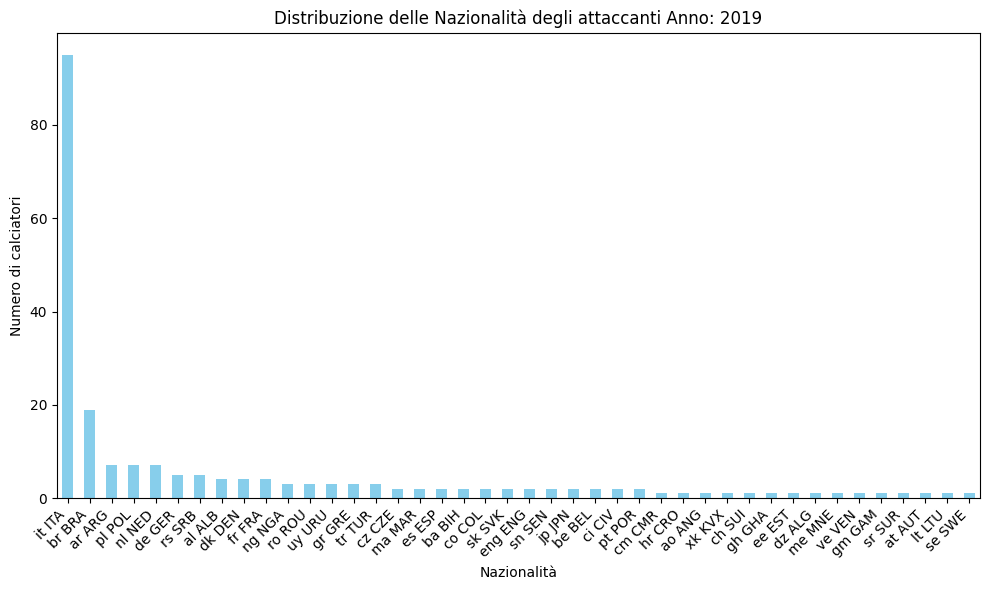

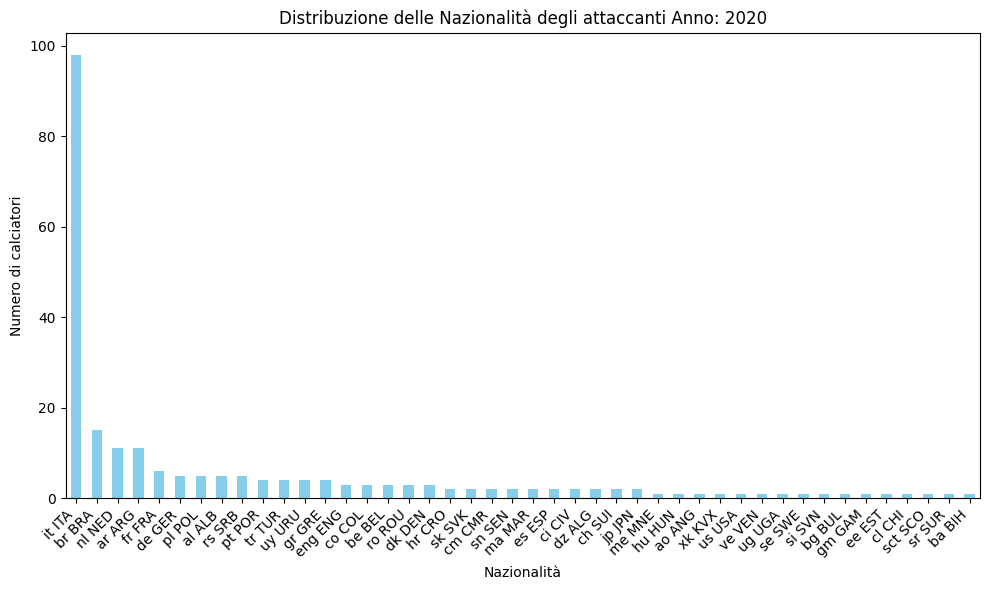

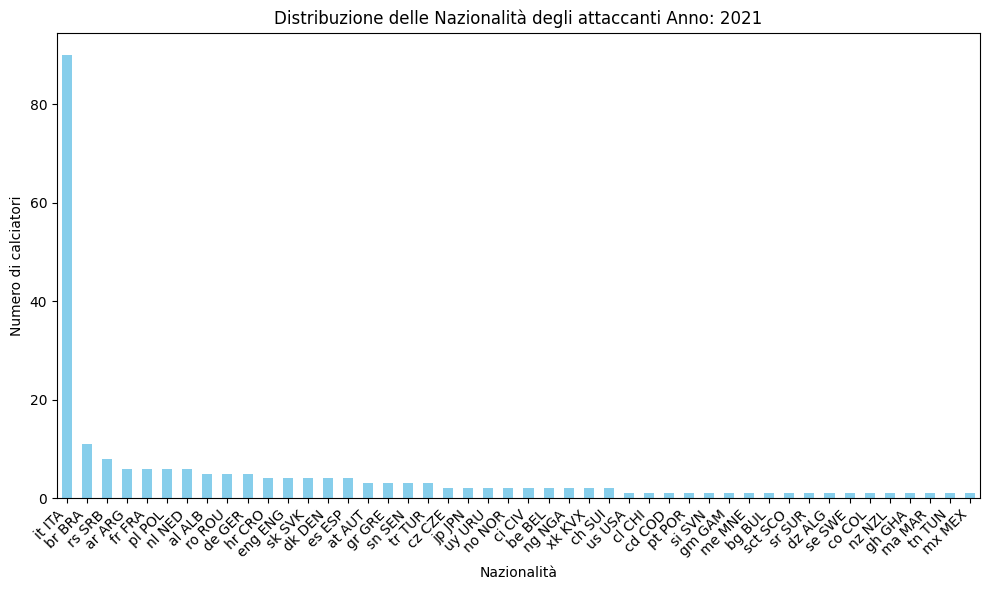

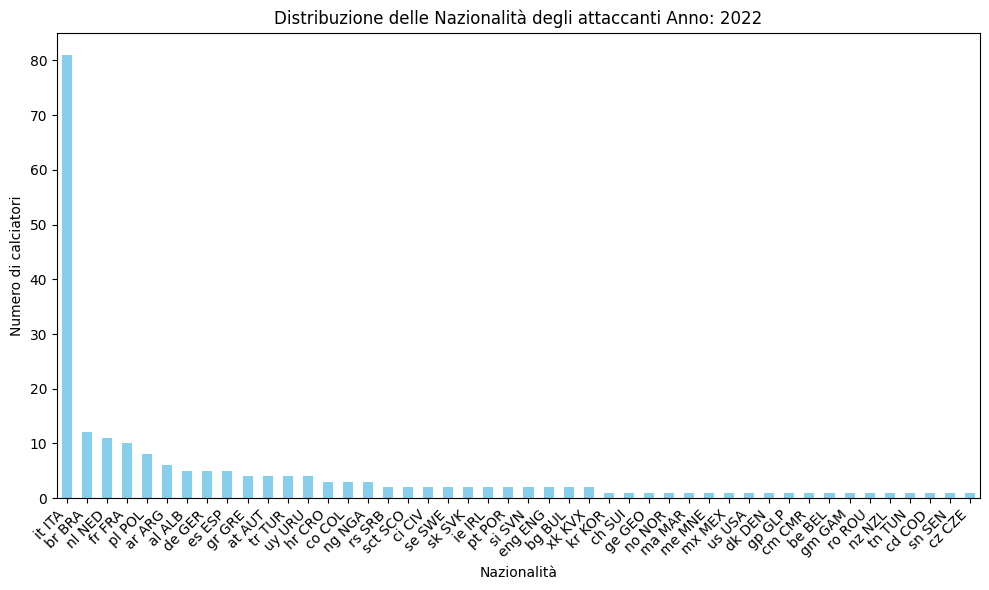

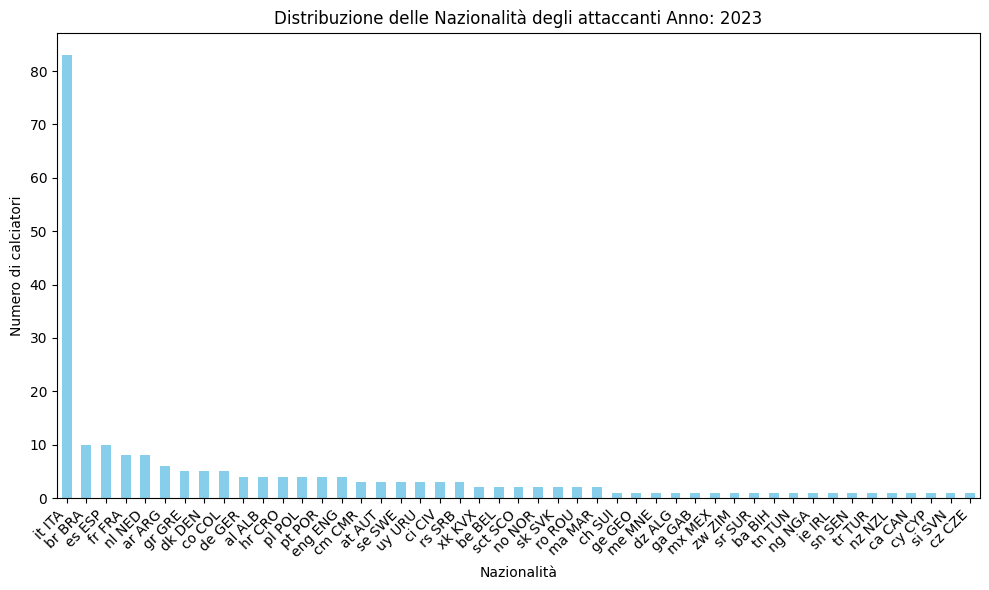

In [13]:
# Ciclo sui file per generare i grafici
for file in files:

    data = pd.read_excel(file)
     
    nazionalita = data['Nation']   #istogramma nazionalità

    # Conta il numero di calciatori per ciascuna nazionalità
    nazionalita_counts = nazionalita.value_counts()

    # Crea l'istogramma
    fig, ax = plt.subplots(figsize=(10, 6))
    nazionalita_counts.plot(kind='bar', ax=ax, color='skyblue')

    # Aggiungi i titoli e le etichette
    ax.set_title(f'Distribuzione delle Nazionalità degli attaccanti Anno: {year[file]}')
    ax.set_xlabel('Nazionalità')
    ax.set_ylabel('Numero di calciatori')

    # Ruota le etichette sull'asse x per una migliore leggibilità
    plt.xticks(rotation=45, ha='right')
     # Mostra il grafico
    plt.tight_layout()
    plt.show()
     

Una volta ricavati i dati relativi alla nazionalità di ogni difensore, è stato possibile stimare un istogramma a seconda del numero di calciatori provenienti da quella determinata nazione. Come d'aspettativa, la presenza di calciatori italiani risulta molto più numerosa rispetto alle altre, per via de fatto che l'analisi è stata proprio fatta riferendosi al campionato della nostra penisola. Molto curioso è il dato dovuto alla presenza di difensori brasiliani, i quali sono presenti costantemente nei grafici come seconda nazionalità più diffusa.

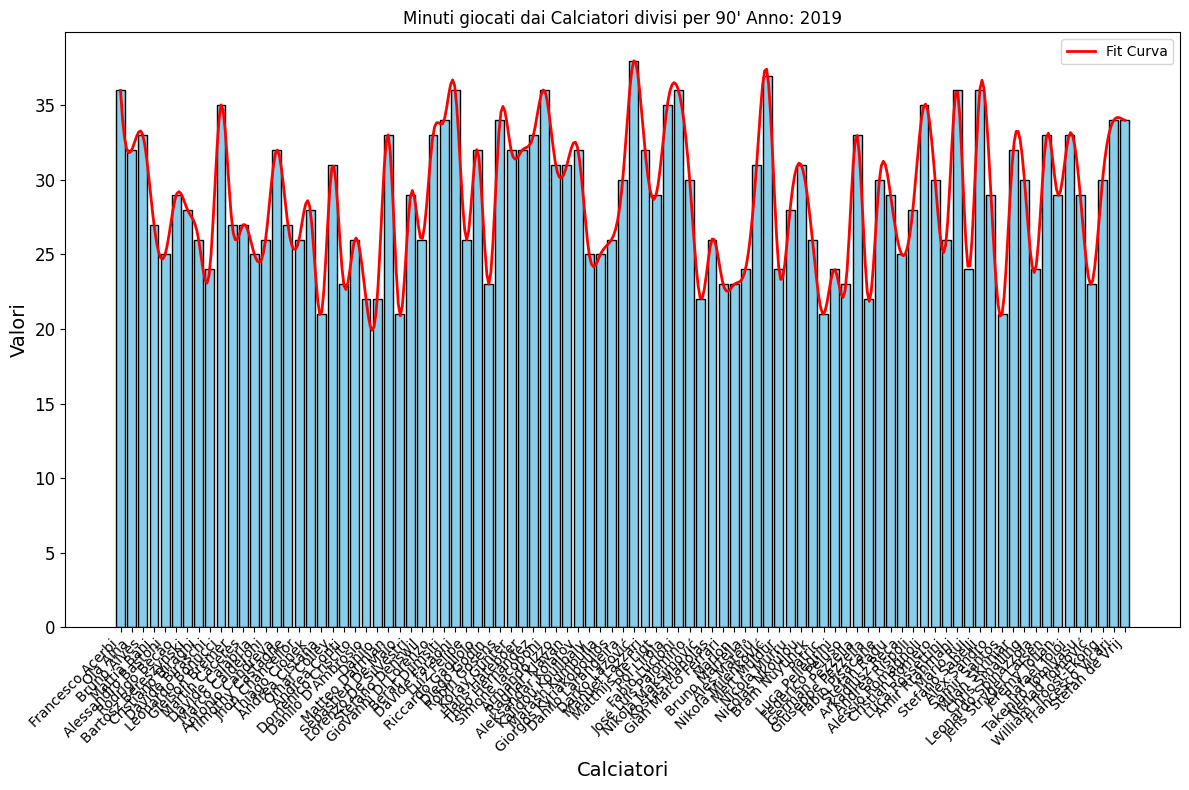

La media per l'Anno 2019 è:28.747252747252748


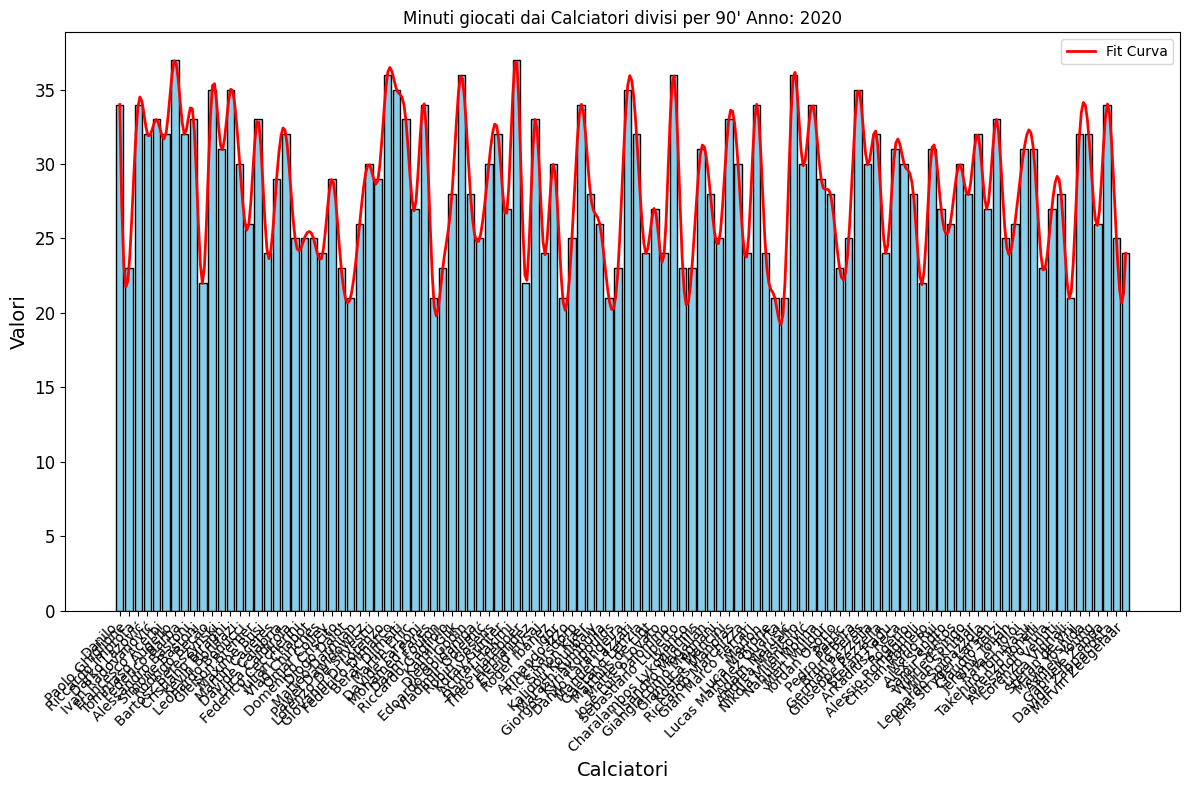

La media per l'Anno 2020 è:28.490909090909092


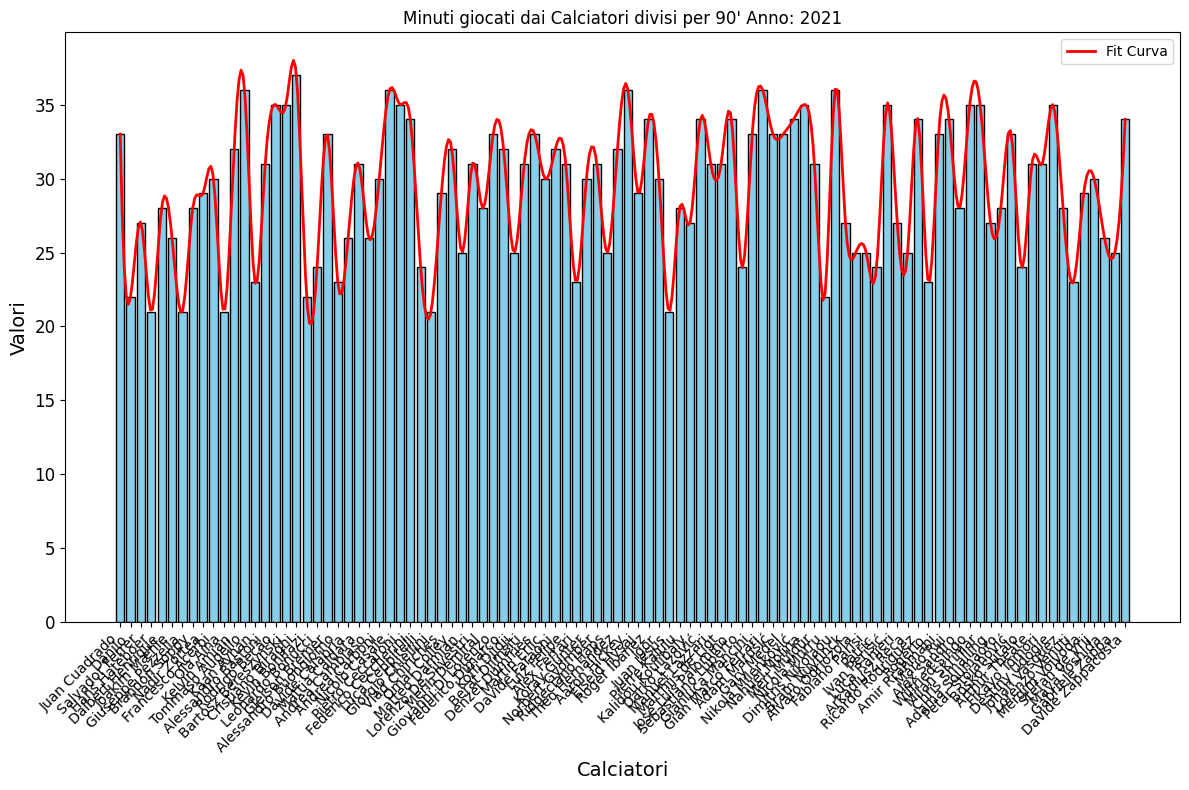

La media per l'Anno 2021 è:29.377551020408163


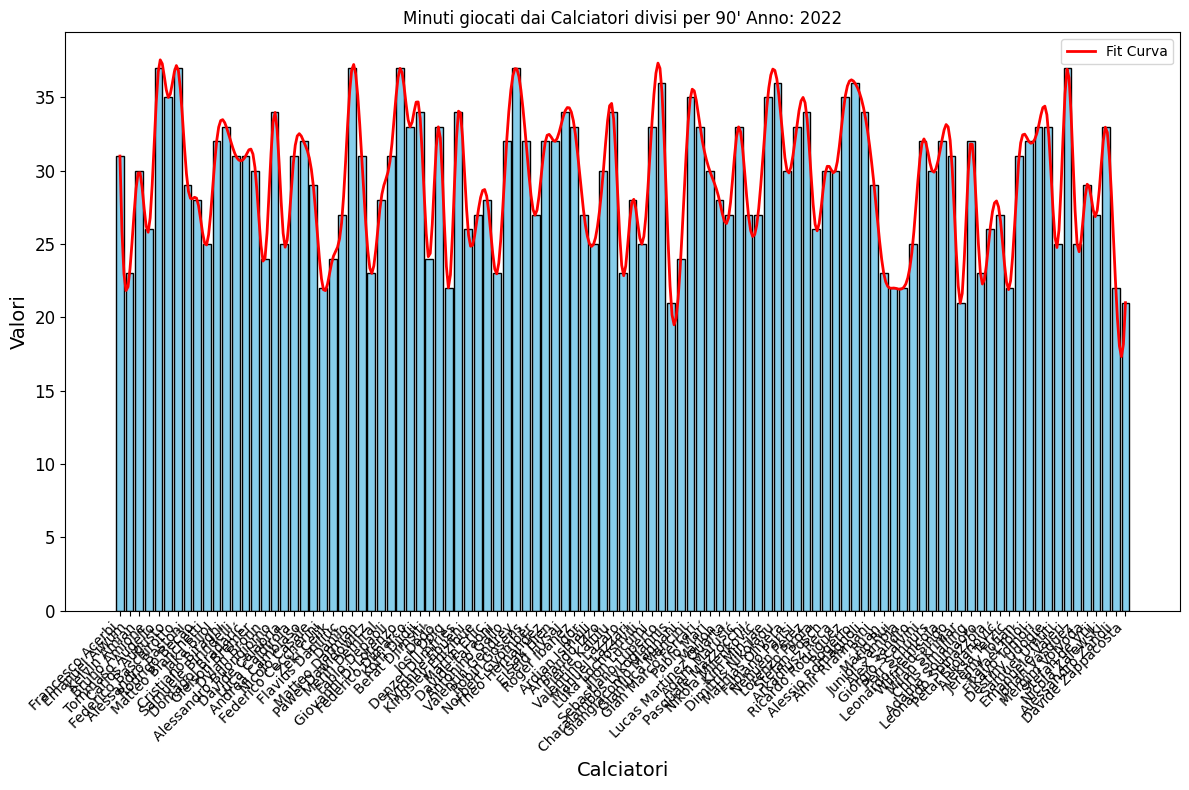

La media per l'Anno 2022 è:29.39047619047619


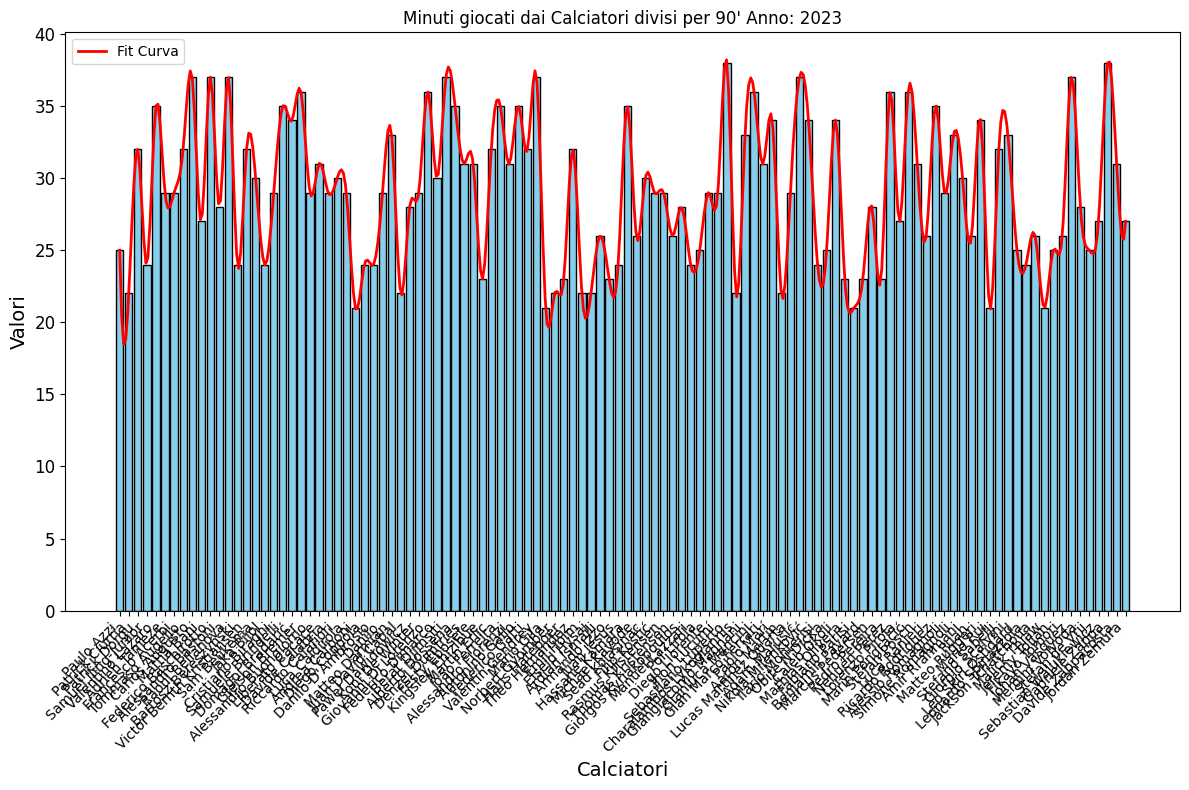

La media per l'Anno 2023 è:29.035714285714285


In [14]:
import numpy as np
from scipy.interpolate import make_interp_spline
for file in files:
 data = pd.read_excel(file)

 # Estrai i dati rilevanti (calciatori e valori nella settima colonna)
 calciatori = data['Player']  # Assume che i nomi dei calciatori siano nella prima colonna
 valori = data['MP']      # Settima colonna partendo da sinistra

 filtrato = valori > 20
 calciatori_filtrati = calciatori[filtrato]
 valori_filtrati = valori[filtrato]

 # Crea un istogramma
 plt.figure(figsize=(12, 8))
 plt.bar(calciatori_filtrati, valori_filtrati, color='skyblue', edgecolor='black')

 # Ottimizza il layout
 plt.xlabel('Calciatori', fontsize=14)
 plt.ylabel('Valori', fontsize=14)
 plt.title(f"Minuti giocati dai Calciatori divisi per 90' Anno: {year[file]}")
 plt.xticks(rotation=45, ha='right', fontsize=10)
 plt.yticks(fontsize=12)

 # Aggiungi una curva di fit
 x = np.arange(len(calciatori_filtrati))  # Converti l'indice dei calciatori filtrati in numerico
 spl = make_interp_spline(x, valori_filtrati, k=3)  # Fit con spline
 x_smooth = np.linspace(x.min(), x.max(), 500)  # Genera un range di valori lisciato
 y_smooth = spl(x_smooth)

 plt.plot(x_smooth, y_smooth, color='red', linewidth=2, label='Fit Curva')

 plt.tight_layout()
 plt.legend()
 plt.show()

 media_valori_filtrati = valori_filtrati.mean()

 # Mostra il risultato
 print(f"La media per l'Anno {year[file]} è:{media_valori_filtrati}")

Considerando i calciatori con almeno 20 apparizioni, è stato stimato il numero medio di minuti giocati a partita da parte di un difensore. Come si può evincere dai risultati dovuti alle medie per anno, si ha un valore pressochè costante ed oscillante tra 28 e 29.

In [15]:
# Aggiungiamo una cella di codice che stampa gli istogrammi di tutte le statistiche di tutti 5 gli anni. In modo da poterli 
# analizzare singolarmente in seguito, senza appesantire il codice con tutti i grafici.

In [17]:
import numpy as np

def calculate_bins(data):
    n = len(data)
    sigma = np.std(data)
    IQR = np.percentile(data, 75) - np.percentile(data, 25)
    
    # Regola di Freedman-Diaconis
    bin_width_fd = 2 * IQR / (n ** (1/3))
    num_bin_fd = int(np.ceil((data.max() - data.min()) / bin_width_fd))
    
    return num_bin_fd

In questa cella definiamo una funzione che calcola il numero ottimale di bin per un istogramma utilizzando la regola di Freedman-Diaconis. Questa regola è utile per determinare la larghezza dei bin in modo da bilanciare la risoluzione del grafico e la variabilità dei dati. La funzione consist nel calcolare la deviazione standard e l'intervallo interquartile (IQR) dei dati, utilizzare la regola di Freedman-Diaconis per determinare la larghezza dei bin e calcolare il numero di bin necessari e lo restituisce.

In [18]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def plot_histogram(data, label, xlabel, ylabel, title):
    # Filtra i valori non finiti (inf, -inf) e rimuovi NaN
    data = data.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Calcola il numero di bin
    num_bins = calculate_bins(data)
    
    # Crea un istogramma dei dati
    plt.figure(figsize=(10, 6))
    counts, bins, _ = plt.hist(data, bins=num_bins, alpha=0.7, color='blue', edgecolor='black', label=label)
    
    # Funzione di fit (es. Gaussiana)
    def gauss(x, a, x0, sigma):
        return a * np.exp(-(x - x0)**2 / (2 * sigma**2))
    
    # Calcola il centro dei bins per il fit
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    # Parametri iniziali per il fit gaussiano
    p0 = [max(counts), data.mean(), data.std()]
    
    # Fit dei dati con la funzione gaussiana
    try:
        popt, _ = curve_fit(gauss, bin_centers, counts, p0=p0, maxfev=2000)
        print("Parametri ottimali del fit:", popt)  # Stampa i parametri ottimali del fit
        # Sovrapposizione del fit sull'istogramma solo se il fit ha successo
        x_fit = np.linspace(bins[0], bins[-1], 100)
        y_fit = gauss(x_fit, *popt)
        plt.plot(x_fit, y_fit, color='red', label='Fit Gaussiano')
    except RuntimeError as e:
        print(f"Errore durante il fitting: {e}")
    
    # Personalizzazione del grafico
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    
    # Mostra il grafico
    plt.show()
    
    # Calcola e mostra la media dei dati
    media_valori = data.mean()
    print(f"La media risulta: {media_valori}")

In questa cella, definiamo la funzione plot_histogram che crea un istogramma dei dati e sovrappone un fit gaussiano. La funzione:
Filtra i valori non finiti (inf, -inf) e rimuove i NaN dai dati.
Calcola il numero di bin utilizzando la funzione calculate_bins.
Crea un istogramma dei dati.
Definisce una funzione gaussiana per il fit.
Calcola i centri dei bin per il fit.
Esegue il fit gaussiano sui dati e sovrappone la curva gaussiana all'istogramma.
Personalizza il grafico con etichette, titolo, legenda e griglia.
Mostra il grafico.
Calcola e stampa la media dei dati.

In [19]:
# def utilizzato per creare le varie funzioni che verranno poi richiamate in seguito
def calcola_tackle(data): 
    # Calcola il rapporto tra i tackle riusciti e i tackle totali per ogni calciatore
    rapporti = data['TklW'] / data['Tkl']
    # Visualizza un istogramma dei rapporti dei tackle riusciti
    plot_histogram(rapporti, 'Tackles', 'Tackles riusciti', 'Numero di calciatori', 'Istogramma dei Tackles riusciti')

In questa cella, calcoliamo il rapporto tra i tackle riusciti (TklW) e i tackle totali (Tkl) per ogni calciatore. Questo rapporto fornisce un'indicazione dell'efficacia difensiva di ciascun giocatore. Utilizziamo la funzione plot_histogram per visualizzare i risultati in un istogramma, che mostra la distribuzione dei rapporti.

In [20]:
def calcola_intercettazioni(data):
    # Estrae il numero di intercettazioni per ogni calciatore
    intercettazioni = data['Blocks']
    # Visualizza un istogramma delle intercettazioni
    plot_histogram(intercettazioni, 'Intercettazioni', 'Intercettazioni', 'Numero di calciatori', 'Istogramma delle intercettazioni')

Qui, ci concentriamo sul calcolo delle intercettazioni, rappresentate dalla colonna Blocks\. Le intercettazioni sono un'importante statistica difensiva, e visualizzarle in un istogramma ci permette di comprendere meglio la distribuzione delle prestazioni difensive tra i calciatori.

In [27]:
def calcola_passaggi(data):
    # Calcola la precisione media dei passaggi combinando le percentuali di passaggi riusciti a breve, medio e lungo raggio
    rapporti = (data['short Cmp%'] + data['medium Cmp%'] + data['long Cmp%']) / 3
    # Visualizza un istogramma della precisione dei passaggi
    plot_histogram(rapporti, 'Precisione passaggi', 'Passaggi riusciti %', 'Numero di calciatori', 'Istogramma dei passaggi riusciti')


In questa cella, calcoliamo la precisione media dei passaggi combinando le percentuali di passaggi riusciti a breve, medio e lungo raggio. Questo approccio fornisce una visione complessiva dell'abilità di passaggio di un calciatore. L'istogramma risultante mostra come si distribuiscono queste percentuali tra i giocatori.

In [21]:
def calcola_gol(data):
    # Estrae il numero di gol segnati per ogni calciatore
    gol = data['Gls']
    # Visualizza un istogramma dei gol segnati
    plot_histogram(gol, 'Gol', 'Gol', 'Numero di calciatori', 'Istogramma dei gol')


Qui, ci occupiamo del conteggio dei gol segnati da ciascun calciatore, utilizzando la colonna Gls\. Visualizzare il numero di gol in un istogramma ci aiuta a identificare i marcatori più prolifici e a comprendere la distribuzione delle prestazioni offensive.

In [22]:
def calcola_assist(data):
    # Estrae il numero di presenze per ogni calciatore
    presenze = data['MP']
    # Estrae il numero di assist per ogni calciatore
    ast = data['Ast']
    # Filtra i dati per considerare solo i calciatori con almeno 5 presenze
    filtrati = data[presenze >= 5]
    ast = filtrati['Ast']
    # Visualizza un istogramma degli assist
    plot_histogram(ast, 'Assist', 'Assist', 'Numero di calciatori', 'Istogramma degli assist')


In questa cella, calcoliamo il numero di assist forniti dai calciatori. Filtriamo i dati per considerare solo i giocatori con almeno 5 presenze (MP), in modo da garantire che i risultati siano significativi. L'istogramma mostra la distribuzione degli assist tra i calciatori.

In [23]:
def calcola_cartellini(data):
    # Somma i cartellini gialli e rossi per ogni calciatore
    cart = data['CrdY'] + data['CrdR']
    # Visualizza un istogramma dei cartellini
    plot_histogram(cart, 'Cartellini', 'Cartellini', 'Numero di calciatori', 'Istogramma dei cartellini')

Qui, sommiamo i cartellini gialli (CrdY) e rossi (CrdR) per ottenere il totale dei cartellini ricevuti da ciascun calciatore. Questo dato è utile per valutare la disciplina di un giocatore. L'istogramma risultante mostra come si distribuiscono i cartellini tra i calciatori.

In [24]:
def calcola_key_passes(data):
    # Estrae il numero di presenze per ogni calciatore
    presenze = data['MP']
    # Estrae il numero di key passes per ogni calciatore
    kp = data['KP']
    # Filtra i dati per considerare solo i calciatori con almeno 5 presenze
    filtrati = data[presenze >= 5]
    kp = filtrati['KP']
    # Visualizza un istogramma dei key passes
    plot_histogram(kp, 'Key passes', 'Key passes', 'Numero di calciatori', 'Istogramma dei Key passes')


 In questa cella, calcoliamo il numero di key passes effettuati dai calciatori, filtrando per quelli con almeno 5 presenze. I key passes sono passaggi che portano a un tiro in porta, quindi sono un indicatore importante della creatività offensiva. L'istogramma mostra la distribuzione di questi passaggi tra i calciatori.

In [25]:
def calcola_duelli_aerei(data):
    # Estrae il numero di duelli aerei vinti per ogni calciatore
    Aerw = data['AerWon']
    # Estrae il numero totale di duelli aerei per ogni calciatore
    Aertot = data['AerTot']
    # Calcola il rapporto tra i duelli aerei vinti e i duelli aerei totali per ogni calciatore
    rapporti = Aerw / Aertot
    # Visualizza un istogramma dei rapporti dei duelli aerei vinti
    plot_histogram(rapporti, 'Duelli aerei vinti', 'Duelli aerei vinti', 'Numero di calciatori', 'Istogramma dei duelli aerei vinti')

Infine, calcoliamo il rapporto tra i duelli aerei vinti (AerWon) e i duelli aerei totali (AerTot). Questo rapporto fornisce un'indicazione dell'efficacia di un calciatore nei duelli aerei. L'istogramma risultante mostra la distribuzione di questi rapporti tra i calciatori.

Generazione grafici per l'anno 2019...
Parametri ottimali del fit: [33.82702317  0.58783223  0.10465382]


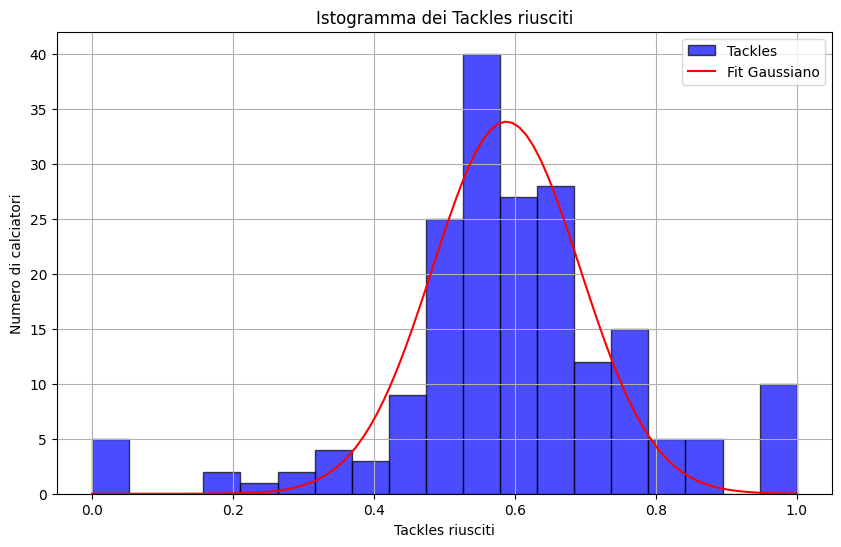

La media risulta: 0.5974324116135669
Errore durante il fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 2000.


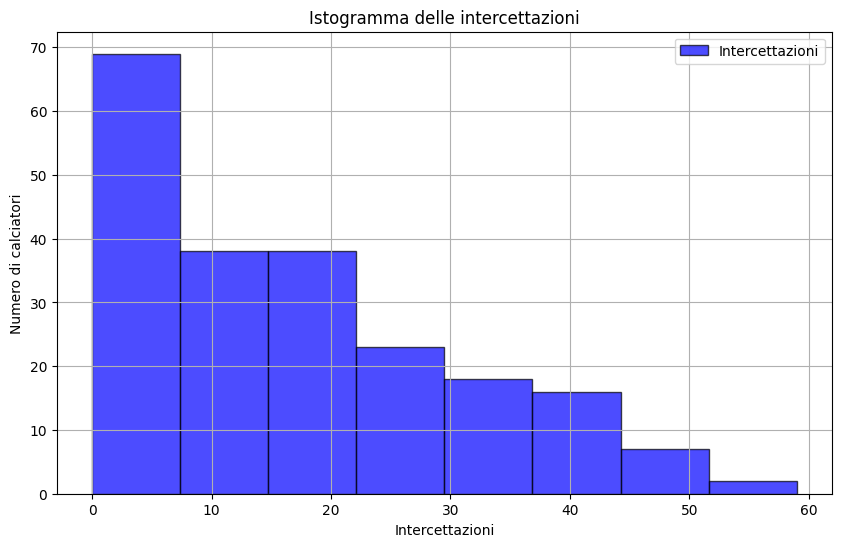

La media risulta: 16.990521327014218
Parametri ottimali del fit: [35.72970009 79.28146182  7.11910241]


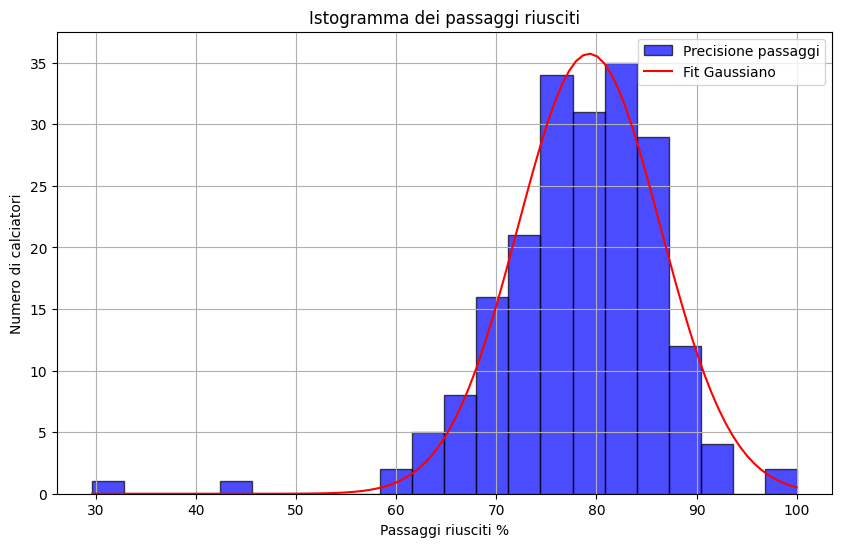

La media risulta: 78.26749585406301
Parametri ottimali del fit: [5.20958272e+02 4.08707815e-02 7.61264111e-02]


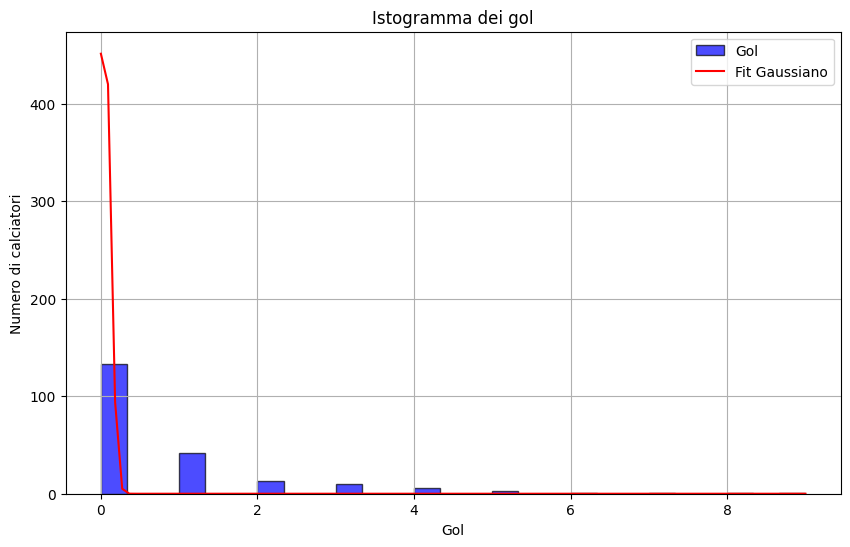

La media risulta: 0.7914691943127962
Parametri ottimali del fit: [ 4.25973050e+02 -1.03127316e-02  1.06972532e-01]


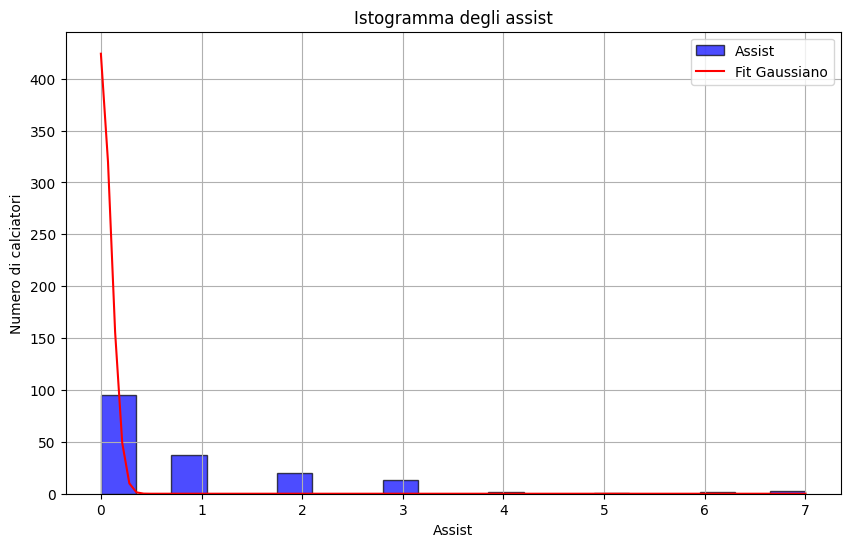

La media risulta: 0.9364161849710982
Parametri ottimali del fit: [183.31062552 -13.54516396   9.57696043]


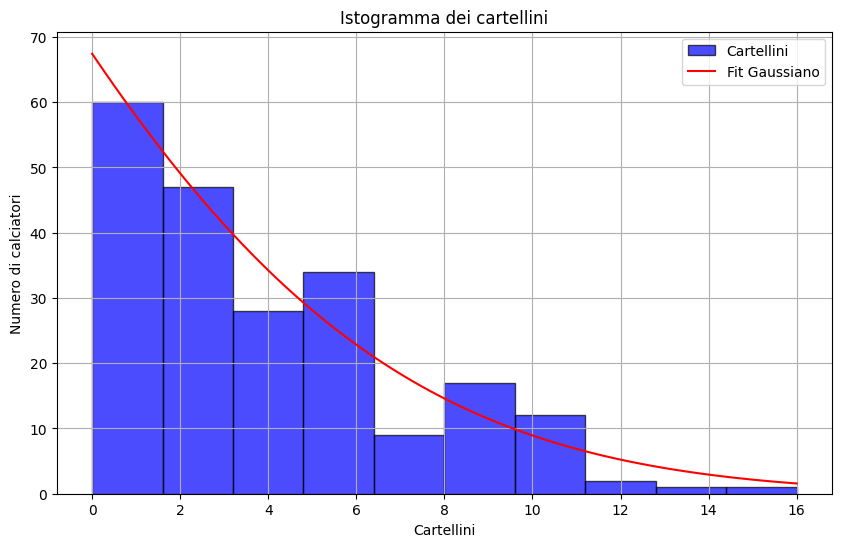

La media risulta: 3.862559241706161
Errore durante il fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 2000.


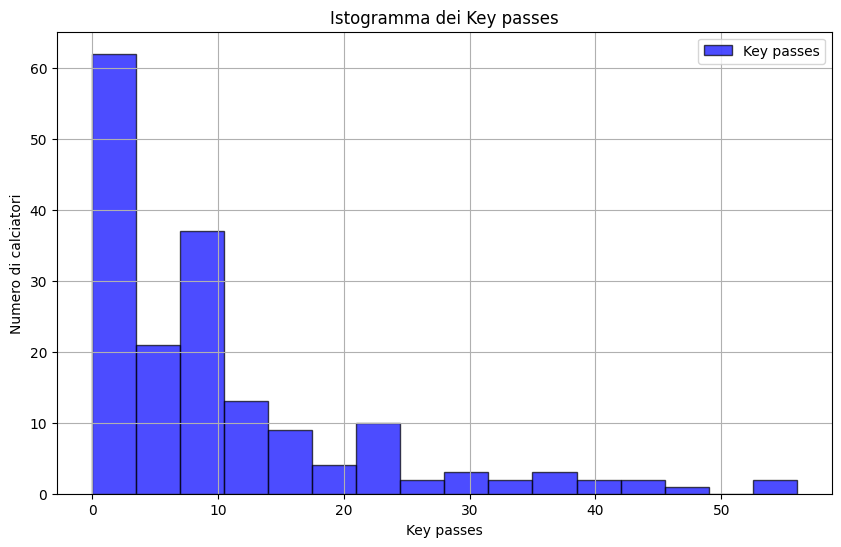

La media risulta: 9.959537572254336
Parametri ottimali del fit: [35.76654216  0.56507112  0.11563006]


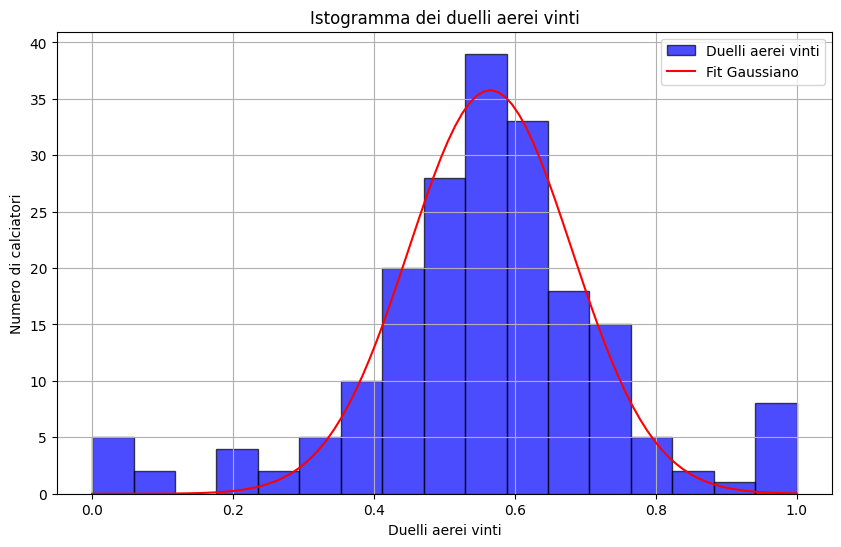

La media risulta: 0.5576496152186043
Generazione grafici per l'anno 2020...
Parametri ottimali del fit: [39.06179364  0.58876328  0.10855674]


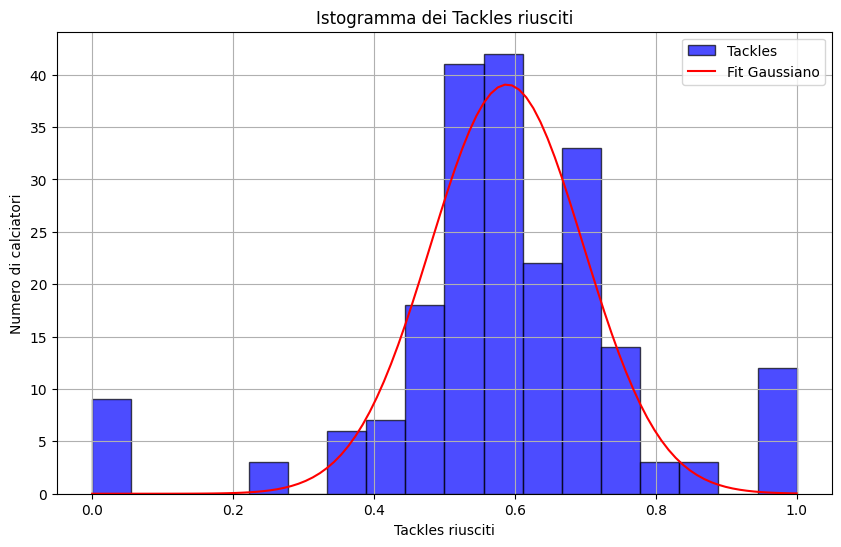

La media risulta: 0.5795166058025643
Parametri ottimali del fit: [140.62992342 -53.74550881  42.57604256]


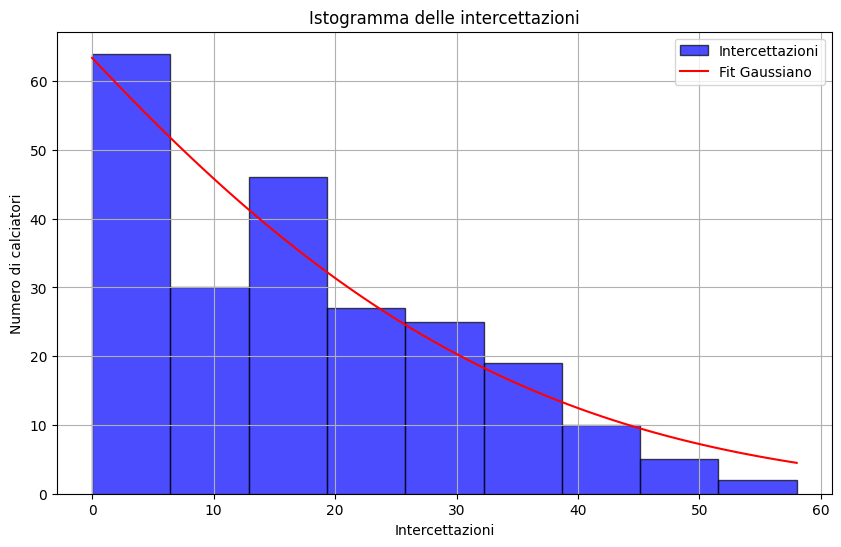

La media risulta: 17.19736842105263
Parametri ottimali del fit: [35.41576825 78.98899475  7.75547918]


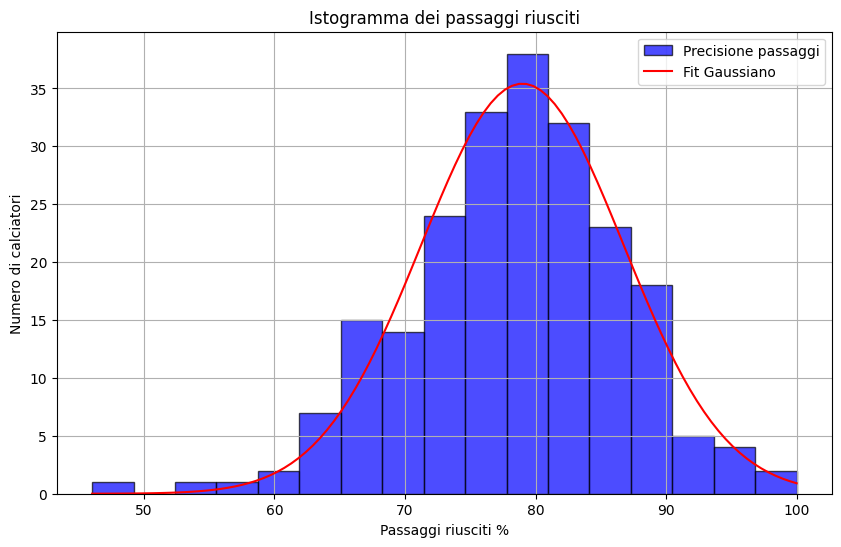

La media risulta: 78.30515151515152
Parametri ottimali del fit: [ 5.52519478e+02 -6.07441857e-03  1.01817063e-01]


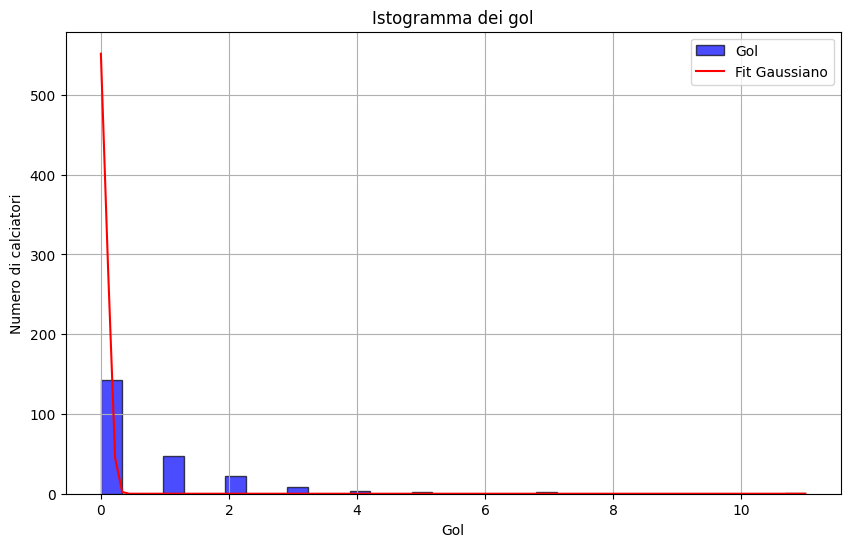

La media risulta: 0.7280701754385965
Errore durante il fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 2000.


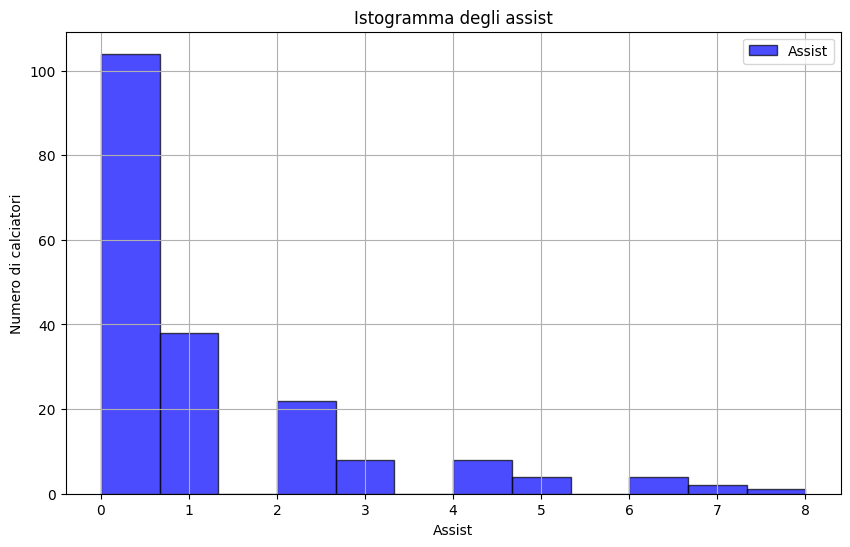

La media risulta: 1.068062827225131
Errore durante il fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 2000.


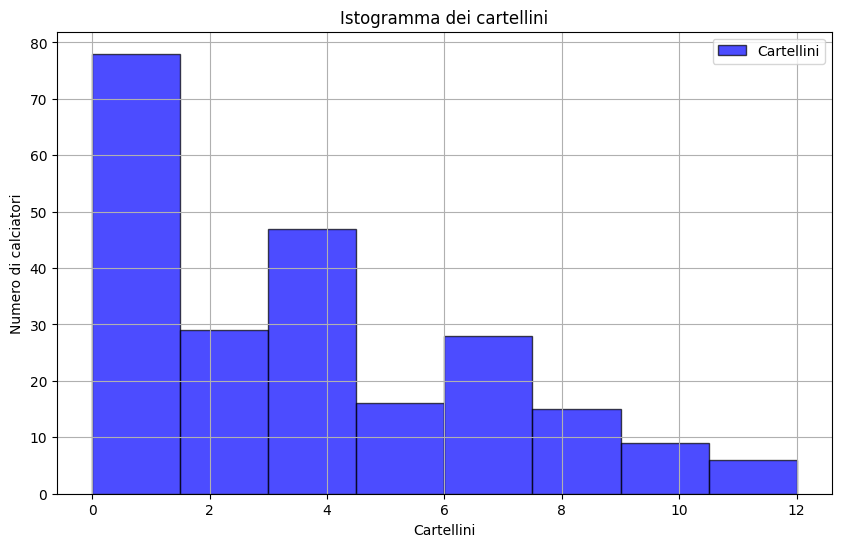

La media risulta: 3.456140350877193
Errore durante il fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 2000.


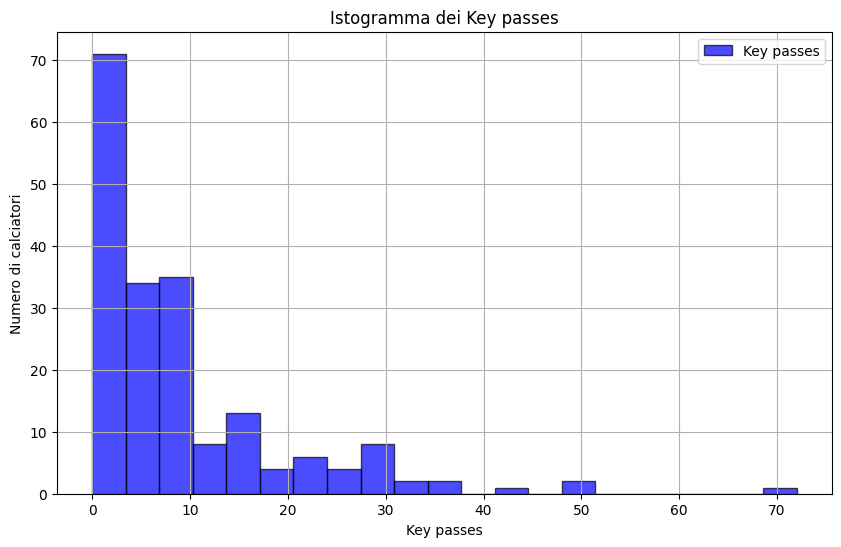

La media risulta: 9.031413612565444
Parametri ottimali del fit: [36.44364215  0.54667353  0.12752965]


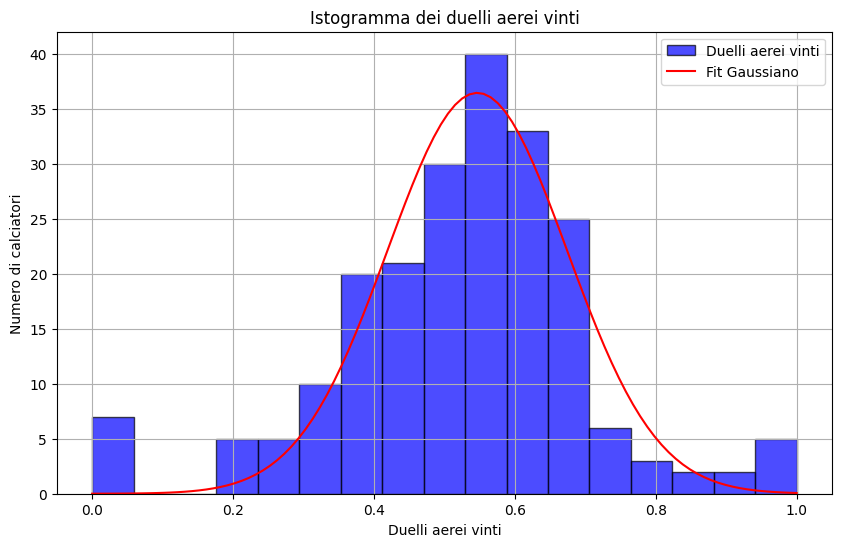

La media risulta: 0.5257924988573672
Generazione grafici per l'anno 2021...
Parametri ottimali del fit: [44.282499    0.5789183   0.07336089]


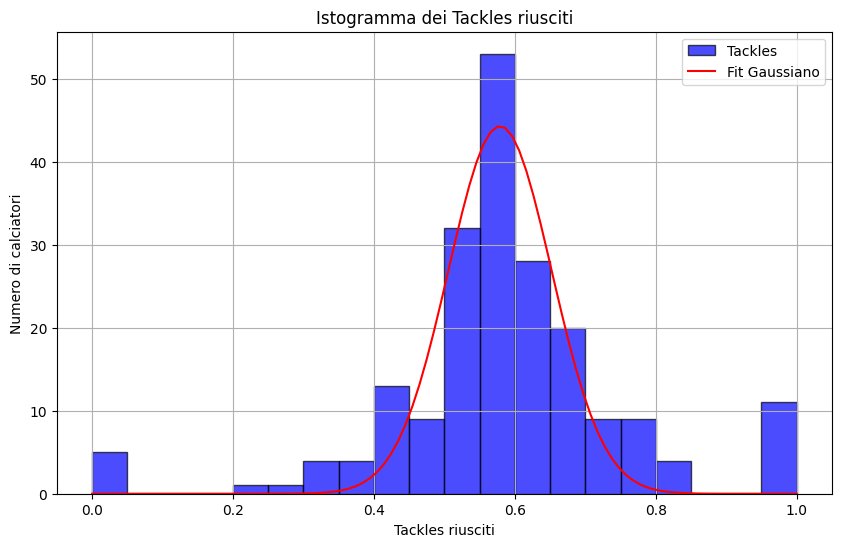

La media risulta: 0.5842373783969937
Parametri ottimali del fit: [127.51526777 -53.9281671   44.23672041]


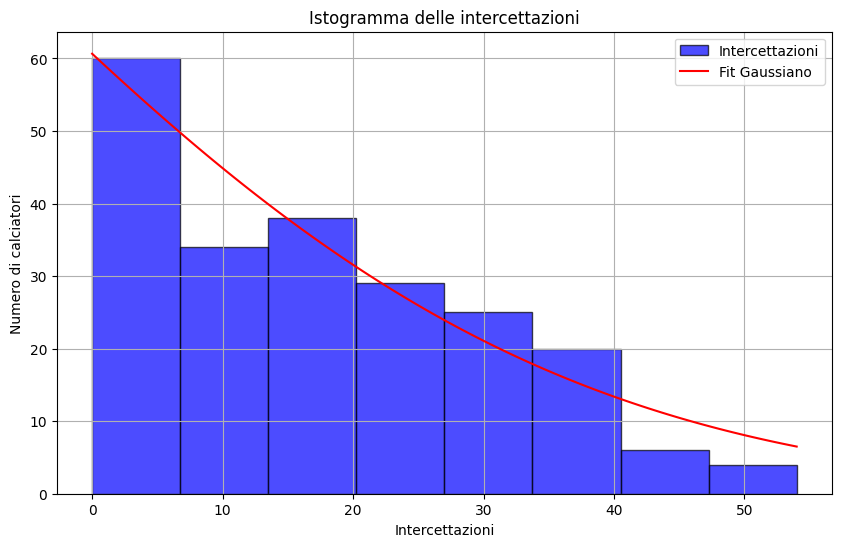

La media risulta: 17.324074074074073
Parametri ottimali del fit: [34.07304581 76.14592066  8.03812602]


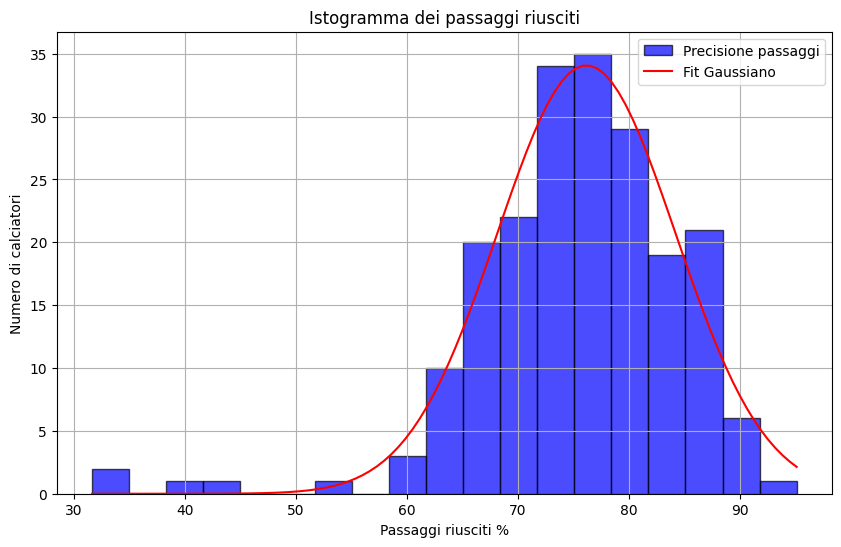

La media risulta: 75.40260162601626
Parametri ottimali del fit: [2.60341977e+02 6.14251137e-02 9.34042598e-02]


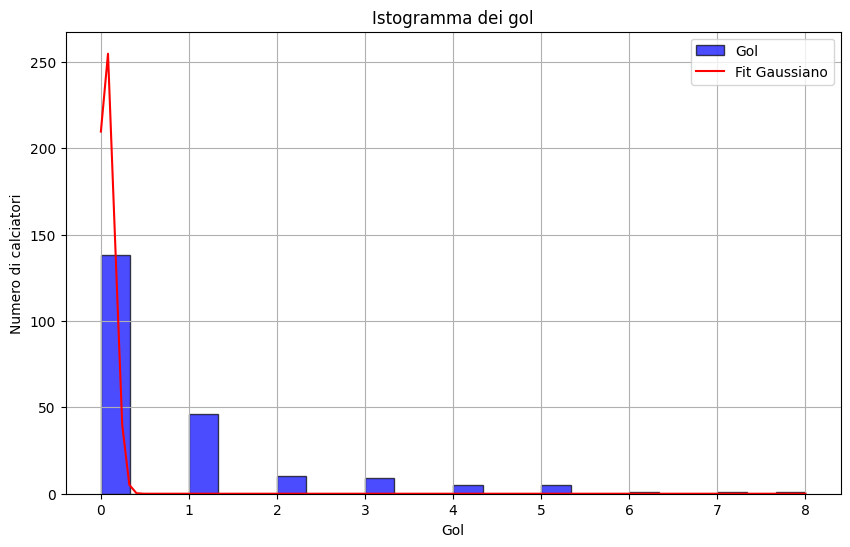

La media risulta: 0.7361111111111112
Parametri ottimali del fit: [2.94746991e+02 2.33680252e-02 1.00197122e-01]


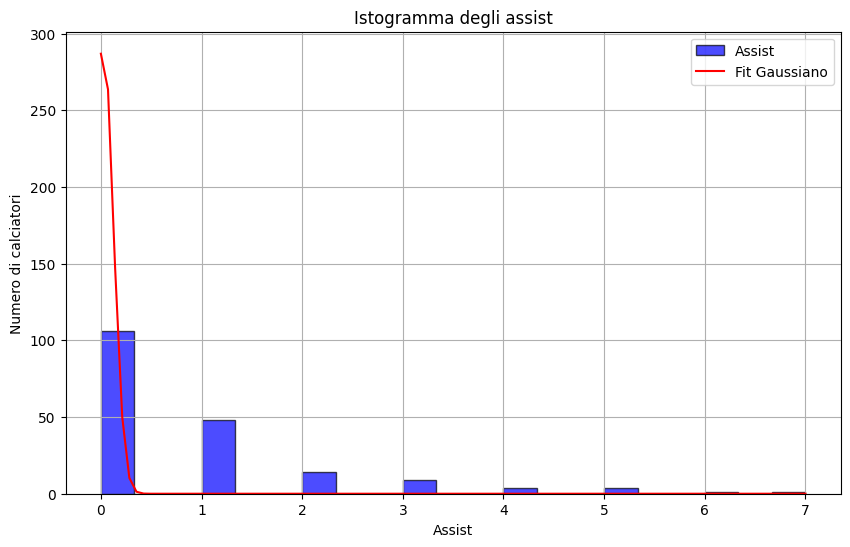

La media risulta: 0.8128342245989305
Parametri ottimali del fit: [954.51908493 -28.48893637  12.23687878]


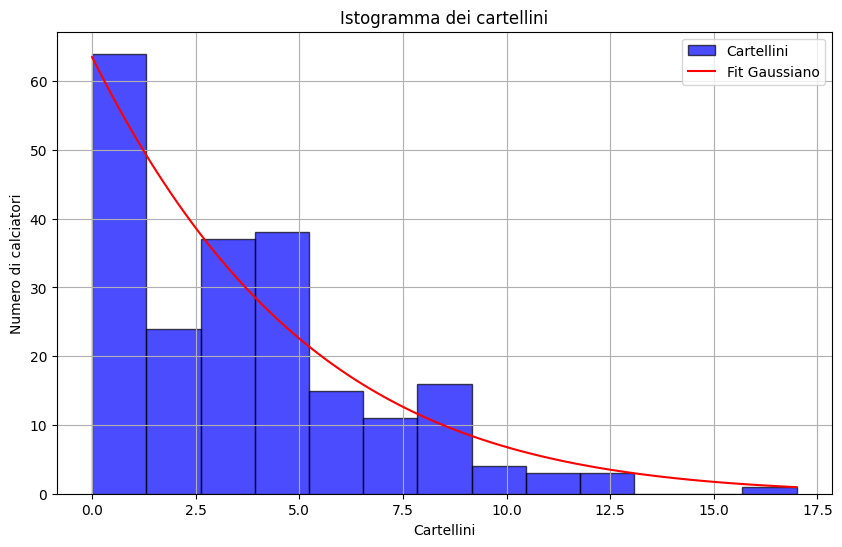

La media risulta: 3.638888888888889
Errore durante il fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 2000.


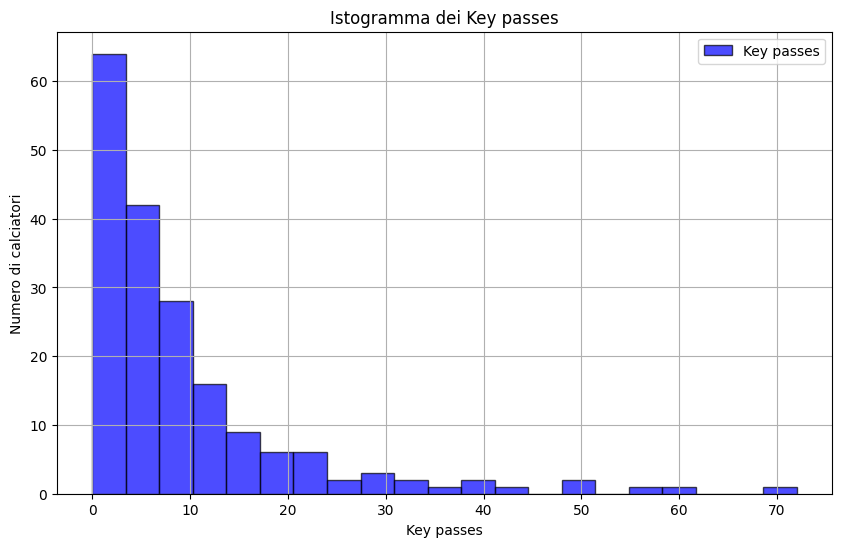

La media risulta: 9.459893048128341
Parametri ottimali del fit: [36.85151608  0.55330532  0.12878487]


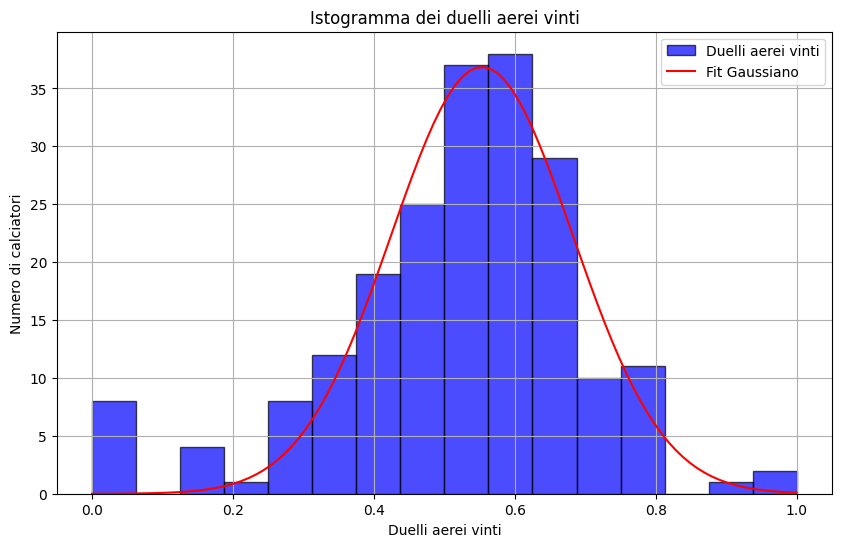

La media risulta: 0.516363760823837
Generazione grafici per l'anno 2022...
Parametri ottimali del fit: [34.69485919  0.59894796  0.10769396]


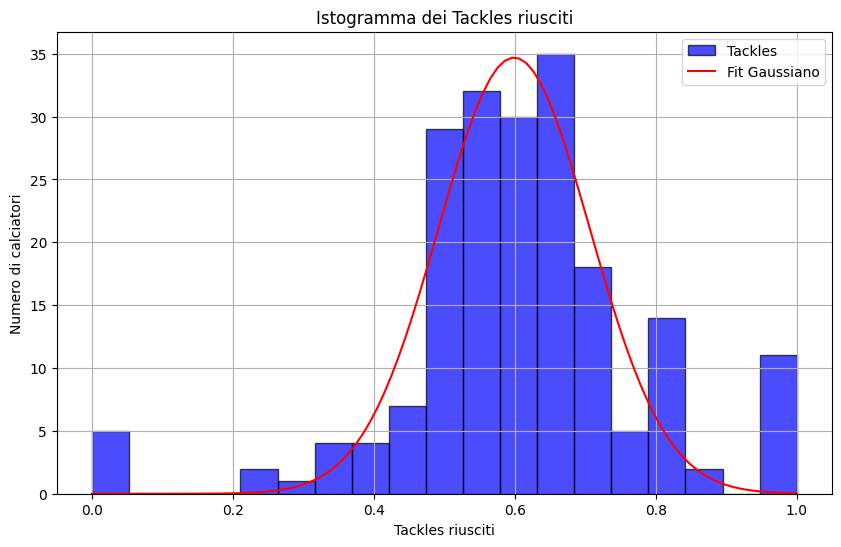

La media risulta: 0.606107023085355
Parametri ottimali del fit: [92220.40380578  -445.17025229   116.87267721]


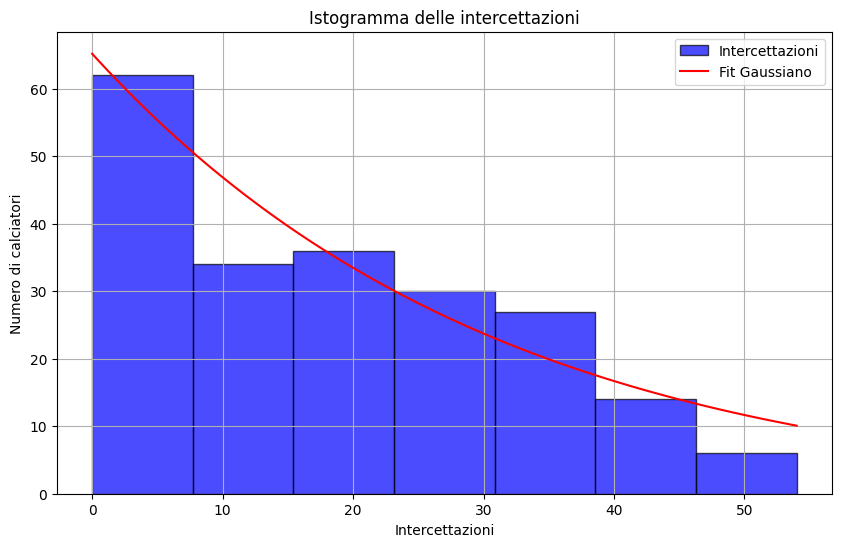

La media risulta: 18.641148325358852
Parametri ottimali del fit: [37.95288586 77.23652249  7.54282222]


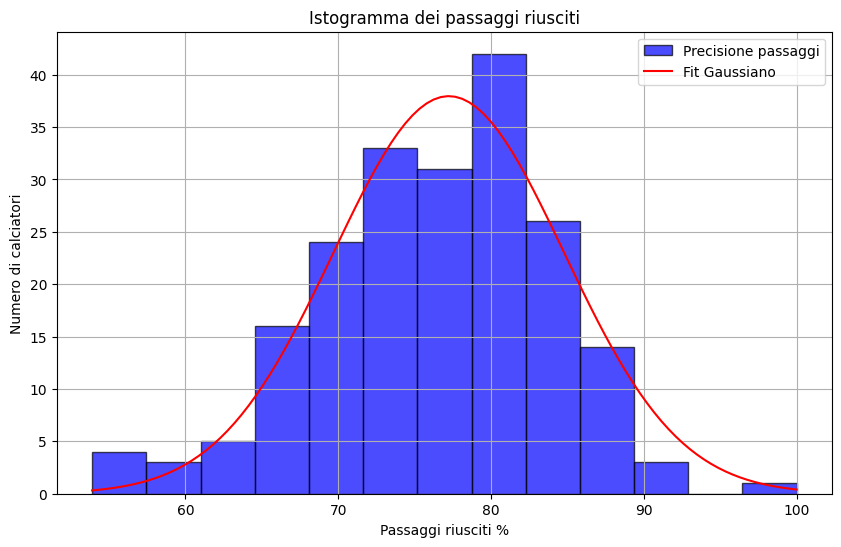

La media risulta: 76.3135313531353
Parametri ottimali del fit: [3.47418344e+02 2.63183547e-02 9.77733874e-02]


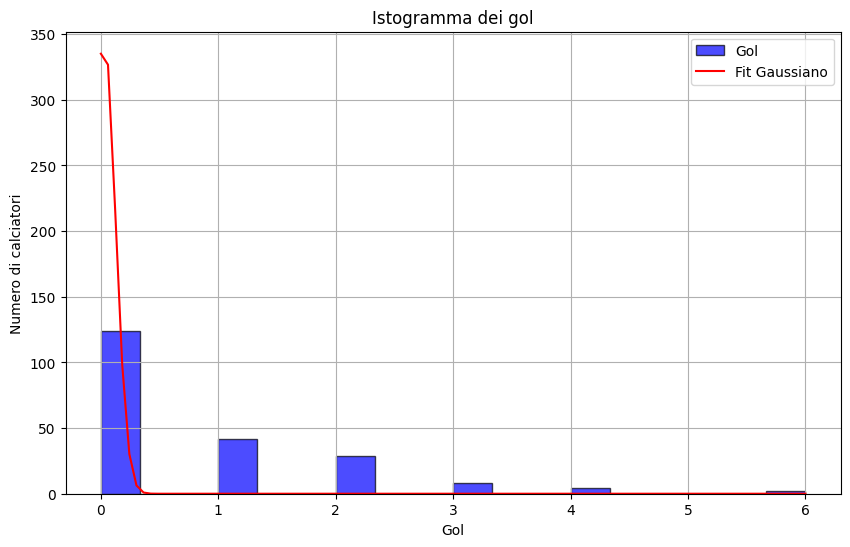

La media risulta: 0.7272727272727273
Parametri ottimali del fit: [4.28807598e+02 3.02700380e-03 1.42252158e-01]


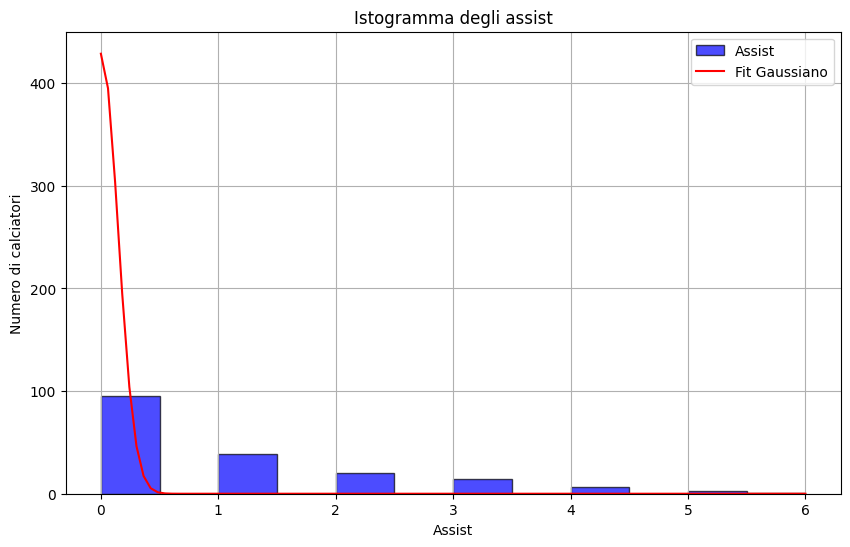

La media risulta: 0.9497206703910615
Parametri ottimali del fit: [139.13868957  -9.14434595   7.89266868]


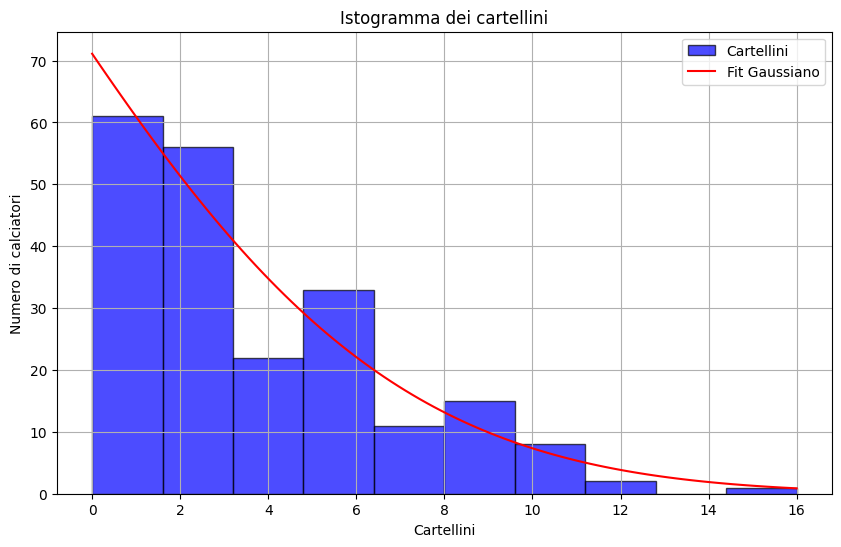

La media risulta: 3.645933014354067
Errore durante il fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 2000.


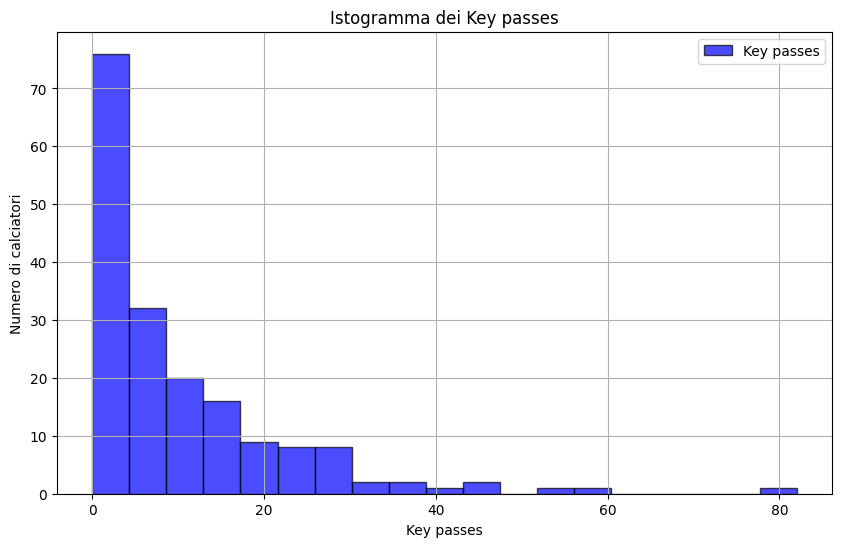

La media risulta: 10.363128491620111
Parametri ottimali del fit: [34.67127313  0.56572947  0.12299   ]


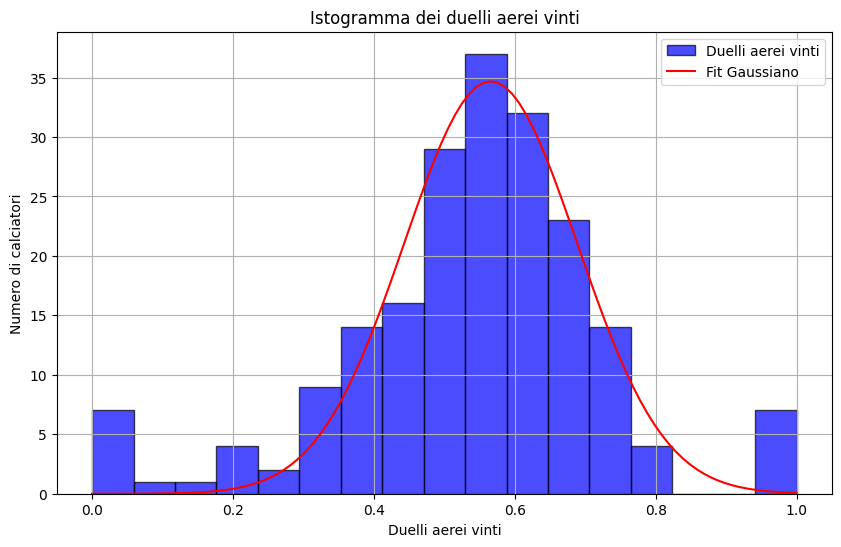

La media risulta: 0.5394684578660446
Generazione grafici per l'anno 2023...
Parametri ottimali del fit: [33.28130386  0.61321678  0.10651926]


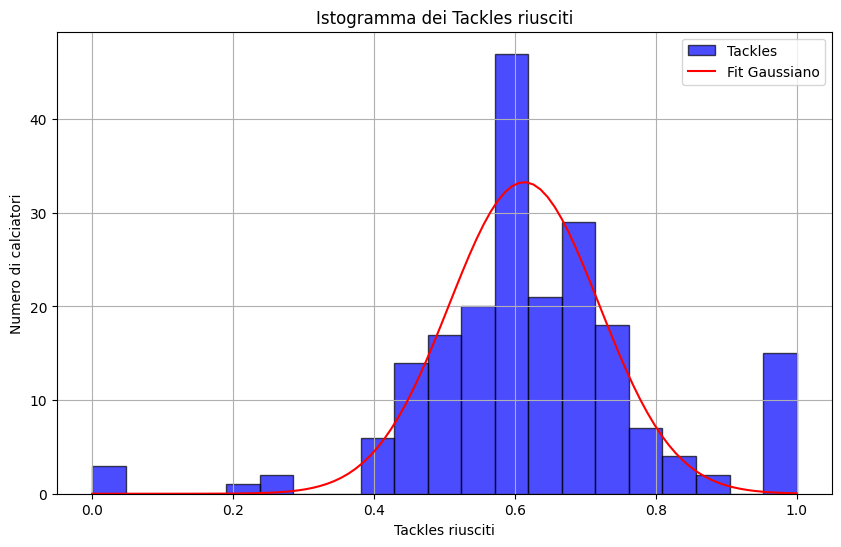

La media risulta: 0.6248235594003889
Parametri ottimali del fit: [40.30794089  4.35655914 22.46448998]


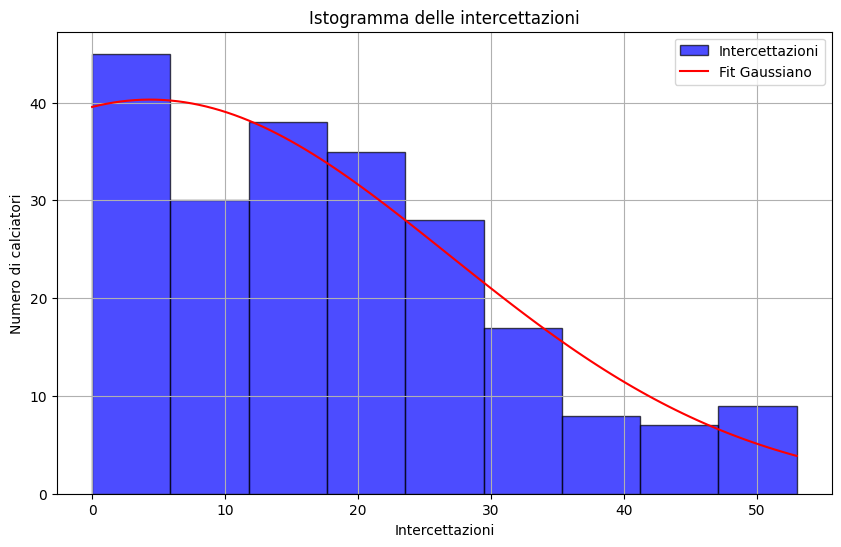

La media risulta: 18.35483870967742
Parametri ottimali del fit: [35.73456568 76.69326162  6.68057377]


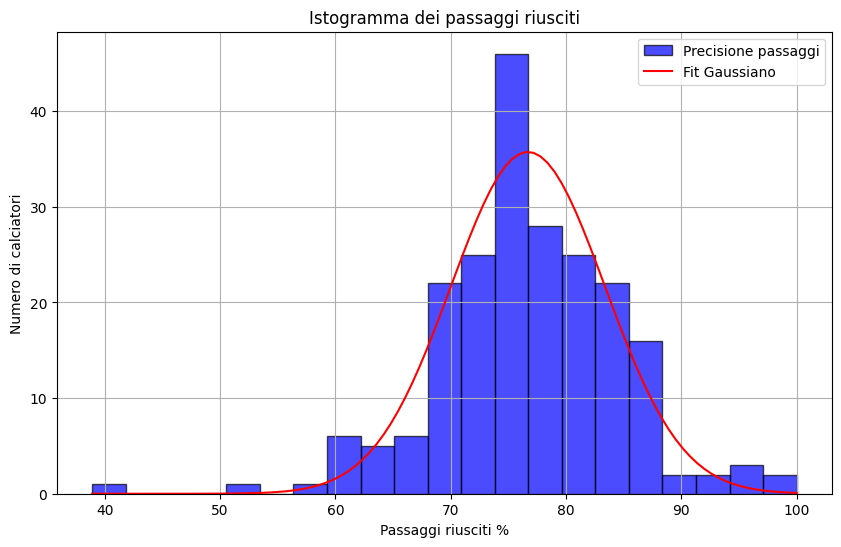

La media risulta: 76.72769953051645
Parametri ottimali del fit: [3.06599073e+02 4.07133130e-02 9.02042565e-02]


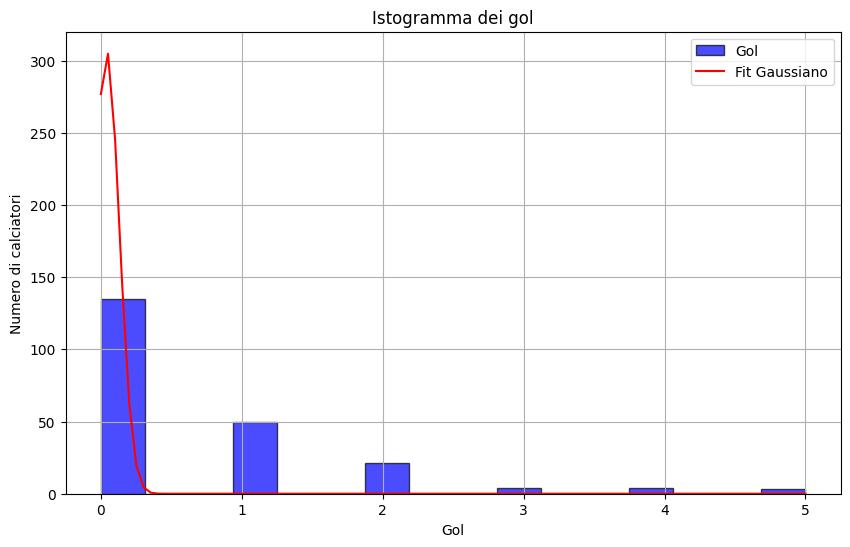

La media risulta: 0.6221198156682027
Parametri ottimali del fit: [ 4.96199783e+02 -3.74873264e-02  1.10844586e-01]


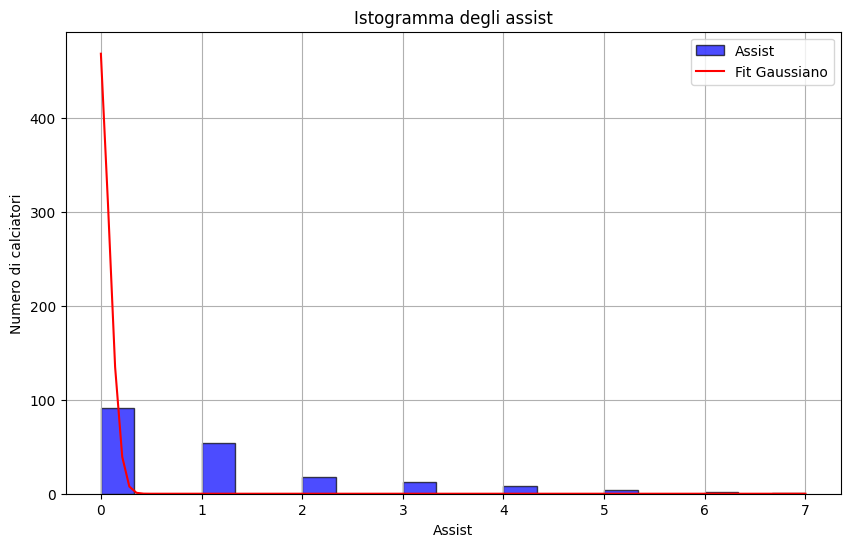

La media risulta: 1.0471204188481675
Errore durante il fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 2000.


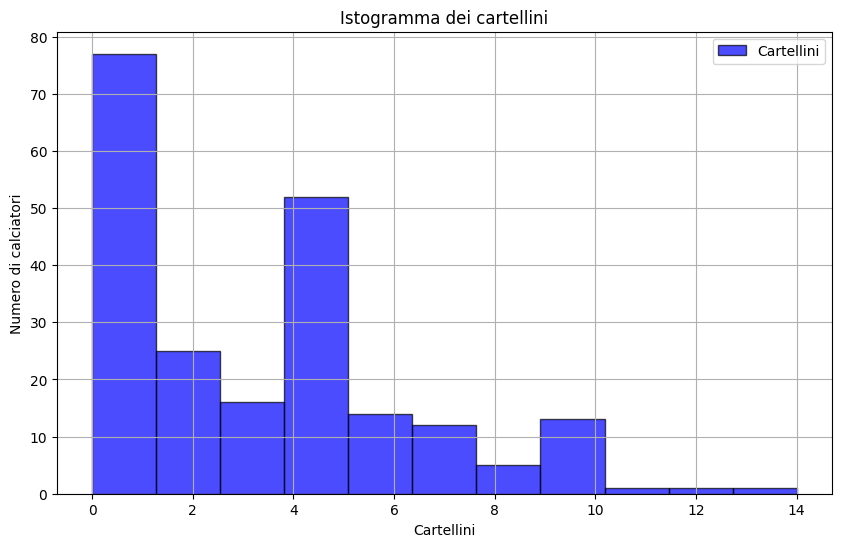

La media risulta: 3.3548387096774195
Errore durante il fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 2000.


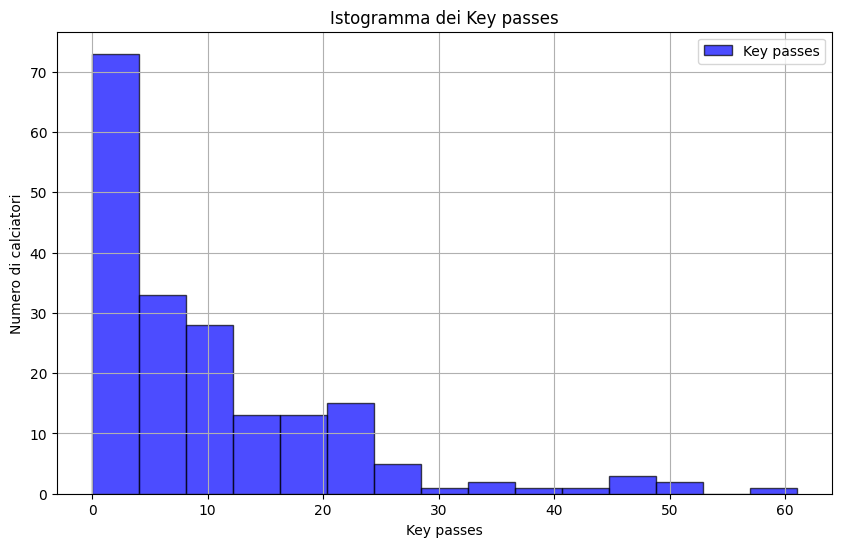

La media risulta: 10.649214659685864
Parametri ottimali del fit: [37.26491956  0.55251612  0.11053252]


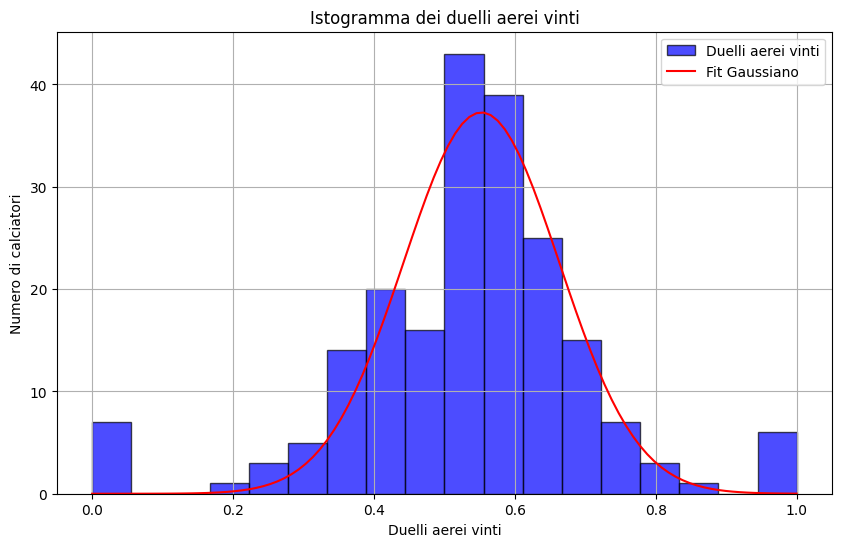

La media risulta: 0.5319547161985876


In [29]:
# Loop attraverso i file e genera i grafici per ogni anno
for file in files:
    # Leggi i dati dal file Excel
    data = pd.read_excel(file)
    
    # Ottieni l'anno corrispondente
    anno = year[file]
    
    # Calcola e visualizza i grafici per ciascuna statistica
    print(f"Generazione grafici per l'anno {anno}...")
    
    calcola_tackle(data)
    calcola_intercettazioni(data)
    calcola_passaggi(data)
    calcola_gol(data)
    calcola_assist(data)
    calcola_cartellini(data)
    calcola_key_passes(data)
    calcola_duelli_aerei(data)
    
    # Visualizza o salva i grafici
    plt.show()  # Mostra i grafici a schermo 

In [30]:
import pandas as pd
import plotly.graph_objects as go

# Carica il file Excel
file_path = "C:/Users/milan/OneDrive/Documenti/avarages datas per year.xlsx"
df = pd.read_excel(file_path)
df

season_start_year    age  tackles  blocks  passes   gol  assist  \
0               2019  27.58     0.60   16.99    0.82  0.95    0.94   
1               2020  27.16     0.60   17.20    0.82  0.86    1.07   
2               2021  27.82     0.58   17.32    0.79  0.85    0.81   
3               2022  24.43     0.61   18.64    0.80  0.85    0.95   
4               2023  27.14     0.62   18.35    0.80  0.69    1.05   

   cartellini     kp  AerW  
0        3.86   9.96  0.56  
1        3.45   9.03  0.53  
2        3.65   9.45  0.52  
3        3.65  10.36  0.54  
4        3.35  10.64  0.53

In [31]:
# Verifica la struttura del dataframe per assicurarsi che i dati siano caricati correttamente
print(df.head())

# Non è necessario fare nessuna trasformazione con la colonna 'MIN' dato che non esiste nel tuo file

# Crea il grafico
fig = go.Figure()

# Itera attraverso tutte le colonne eccetto 'season_start_year' per creare le varie linee del grafico
for col in df.columns[1:]:  # Esclude la prima colonna 'season_start_year'
    fig.add_trace(go.Scatter(x=df['season_start_year'], y=df[col], name=col))

# Mostra il grafico
fig.show()


   season_start_year    age  tackles  blocks  passes   gol  assist  \
0               2019  27.58     0.60   16.99    0.82  0.95    0.94   
1               2020  27.16     0.60   17.20    0.82  0.86    1.07   
2               2021  27.82     0.58   17.32    0.79  0.85    0.81   
3               2022  24.43     0.61   18.64    0.80  0.85    0.95   
4               2023  27.14     0.62   18.35    0.80  0.69    1.05   

   cartellini     kp  AerW  
0        3.86   9.96  0.56  
1        3.45   9.03  0.53  
2        3.65   9.45  0.52  
3        3.65  10.36  0.54  
4        3.35  10.64  0.53  


Il codice appena visionato ha quindi generato vari istogrammi, con numero di bin calcolato specificatamente per ogni set di dati, che va ad evidenziare la media delle statistiche più rilevanti per il ruolo de difensore. Successivamente, grazie al calcolo delle medie per anno, sono stati stampati i grafici in modo da analizzare l'evoluzione nel corso degli anni. Le statistiche risultano abbastanza costanti nel tempo, ma sinota comunque come il dato relativo alle intercettazioni e ai key passes sia in crescendo. Ciò va ad evidenziare un maggiore atteggiamento in marcatura per zona, andando ad  anticipare gli avversari piuttosto che entrano in contrasto (infatti il dato dei tackles è leggermente diminuito). I key passes in crescita evidenziano un atteggiamento più offensivo e propositivo, andando a partecipare alle azioni d'attacco con lo scopo di trovare una giocata vincente per arrivare al goal.

In [32]:
pd.set_option('display.max_columns', None)

# Elenco dei file da leggere
files = [r"C:\Users\milan\OneDrive\Documenti\difensori 2019.xlsx", 
         r"C:\Users\milan\OneDrive\Documenti\difensori_2020.xlsx", 
         r"C:\Users\milan\OneDrive\Documenti\difensori_2021.xlsx",
         r"C:\Users\milan\OneDrive\Documenti\difensori_2022.xlsx", 
         r"C:\Users\milan\OneDrive\Documenti\difensori_2023.xlsx"]

# Faccio un dizionario per mappare i file agli anni
year_mapping = { r"C:\Users\milan\OneDrive\Documenti\difensori 2019.xlsx": 2019, 
         r"C:\Users\milan\OneDrive\Documenti\difensori_2020.xlsx": 2020, 
         r"C:\Users\milan\OneDrive\Documenti\difensori_2021.xlsx": 2021,
         r"C:\Users\milan\OneDrive\Documenti\difensori_2022.xlsx":2022, 
         r"C:\Users\milan\OneDrive\Documenti\difensori_2023.xlsx": 2023}
# Questa parte di codice crea 5 figure che rappresentano il riquadro di correlazione fra le statistiche per annata

correlations = []
years = []


colonne_da_eliminare = ['Player','Squad','Nation','Pos','short Cmp%','medium Cmp%','long Cmp%', 'AerTot']

for file in files:
    
    data_frame = pd.read_excel(file)
    # Uso .drop per rimuovere dal data frame quelle statistiche che non voglio usare in questa analisi
    data_frame.drop(columns=colonne_da_eliminare, inplace=True) 

    corr_matrix = data_frame.corr()  # Calcolo la matrice di correlazione

    year = year_mapping[file]  # Ottengo l'anno dal file usando il mapping
    years.append(year)

    fig = px.imshow(corr_matrix, title=f"Matrice di Correlazione - Anno {year}")
    # Ottengo in output il grafico di correlazione

    fig.show()

# Inserisco questa riga di codice in modo da poter visualizzare le colonne usate per l'analisi
print(f'Le colonne usate per questa analisi sono {list(data_frame.columns)}')

Le colonne usate per questa analisi sono ['Age', 'Tkl', 'TklW', 'Blocks', 'Sh', 'Pass', 'Err', 'MP', 'Gls', 'Ast', 'CrdY', 'CrdR', 'KP', 'Fls', 'Crs', 'OG', 'AerWon', 'AerLost', 'CrdY + CrdR']


L'età, come si può ben notare dai grafici, risulta poco correlata con ogni statistica. Ciò evidenzia come nel ruolo del difensore non sia un fattore completamente dipendete al rendimento. Ciò evidenzia come nel ruolo del difensore non sia un fattore completamente dipendete al rendimento. Si nota un'importante correlazione dei tackles con i falli, le intercettazioni e i cartellini, come da aspettativa.



In [33]:
# Creo una funzione che mi permette di scoprire quali sono le statistiche meglio e peggio correlate con una desiderata

def best_worst(stat):
 for file in files:
    year = year_mapping[file]
    data_frame = pd.read_excel(file)

    data_frame.drop(columns=colonne_da_eliminare, inplace=True) 

    corr_matrix = data_frame.corr()

    if stat in corr_matrix.columns:
        # Ordina le correlazioni con la statistica scelta
        sorted_corr = corr_matrix[stat].sort_values(ascending=False)

        # Trova le 5 migliori e peggiori correlazioni (cambiare i range per saperne di più o di meno)
        best_corr = sorted_corr[1:6]  # Parto da 1 per evitare la correlazione della statistica con se stessa
        worst_corr = sorted_corr[-5:]

        print(f"Anno {year}: Le 5 statistiche meglio correlate con {stat} sono:\n{best_corr}")
        print(f"Anno {year}: Le 5 statistiche peggio correlate con {stat} sono:\n{worst_corr}")
    else:
        print(f"La statistica {stat} non è presente nel dataset. Controlla l'input")

# Creo una funzione che restituisce l'elenco degli indci di correlazione di una statistica con le altre anno per anno

def correlazioni_annuali(stat):
    for file in files:
        year = year_mapping[file]
        data_frame = pd.read_excel(file) 

        data_frame.drop(columns=colonne_da_eliminare, inplace=True)

        corr_matrix = data_frame.corr()

        if stat in corr_matrix.columns:
            sorted_corr = corr_matrix[stat].sort_values(ascending=False)

            print(f"Anno {year}: Le correlazioni per {stat} sono:\n{sorted_corr}\n")
        else:
            print(f"La statistica {stat} non è presente nel dataset dell'anno {year}.")
        
# Creo una seconda funzione che mi dice l'indice di correlazione di due statistiche specifiche
# ed il cambiamento di questo nel corso delle stagioni

def correlazione(stat1,stat2):
 correlations = []

 for file in files:
    
    data_frame = pd.read_excel(file)

    data_frame.drop(columns=colonne_da_eliminare, inplace=True)

    corr_matrix = data_frame.corr()

    year = year_mapping[file]

    # Verifica se entrambe le statistiche esistono nella matrice di correlazione
    if stat1 in corr_matrix.columns and stat2 in corr_matrix.columns:
        correlation_value = corr_matrix.loc[stat1, stat2]
        correlations.append((year, correlation_value))
        #print(f"Anno {year}: Correlazione tra {stat1} e {stat2} = {correlation_value}")
    else:
        correlations.append((year, None))

# Creazione del DataFrame per il grafico
 if stat1 in corr_matrix.columns and stat2 in corr_matrix.columns:
    correlation_df = pd.DataFrame(correlations, columns=['Anno', 'Correlazione'])
    
    # Crea il grafico dell'andamento della correlazione nel tempo
    fig = px.line(correlation_df, x='Anno', y='Correlazione', title=f"Correlazione tra {stat1} e {stat2}", markers=True)
    fig.update_xaxes(dtick=1)
    fig.update_yaxes(range = [-1,1], dtick = 0.10)
    fig.show()
 else:
    print("Nessun grafico disponibile: non sono state calcolate correlazioni valide. Controlla l'input")

Otteniamo in output i 5 grafici richiesti relativi alle 5 stagioni prese in considerazione. La barra sulla destra indica l'indice di correlazione in base al colore del quadrato relativo a due colonne. Muovendo il cursore sulle colonne si può vedere le due statistiche prese in considerazione ed il loro indice di correlazione.

La presenza dei colori ci aiuta subito a notare che i grafici si assomigliano molto, nonostante vengano presi in considerazione 5 anni diversi nei quali hanno giocato molti giocatori diversi stagione per stagione. Immaginiamo quindi che gli indici di correlazione rimangano abbastanza costanti durante gli anni. Questo ci fa molto comodo, in quanto ci rassicura sul fatto che i risultati che troveremo non saranno casuali ma validi nel corso degli anni.

Oltre a questa osservazione possiamo anche notare, riconoscendo i colori, che ci sono statistiche mal correlate con tutte le altre.

In [34]:
 stat = 'Tkl'
best_worst(stat)

stat1 = 'Tkl'
stat2 = 'Fls'
correlazione(stat1, stat2)

stat1 = 'Tkl'
stat2 = 'Blocks'
correlazione(stat1, stat2)

stat1 = 'Tkl'
stat2 = 'CrdY + CrdR'
correlazione(stat1, stat2)

Anno 2019: Le 5 statistiche meglio correlate con Tkl sono:
TklW      0.975840
MP        0.841936
Pass      0.835199
Fls       0.827828
Blocks    0.801314
Name: Tkl, dtype: float64
Anno 2019: Le 5 statistiche peggio correlate con Tkl sono:
Crs     0.337695
Ast     0.335082
OG      0.266144
Age     0.206110
CrdR    0.202948
Name: Tkl, dtype: float64
Anno 2020: Le 5 statistiche meglio correlate con Tkl sono:
TklW      0.976159
MP        0.837114
Fls       0.818008
Blocks    0.809983
Pass      0.794690
Name: Tkl, dtype: float64
Anno 2020: Le 5 statistiche peggio correlate con Tkl sono:
Ast     0.466595
Err     0.424412
CrdR    0.205207
OG      0.151535
Age     0.109009
Name: Tkl, dtype: float64
Anno 2021: Le 5 statistiche meglio correlate con Tkl sono:
TklW      0.980722
Pass      0.833451
MP        0.823131
Blocks    0.816972
Fls       0.789293
Name: Tkl, dtype: float64
Anno 2021: Le 5 statistiche peggio correlate con Tkl sono:
Crs     0.367059
Err     0.358312
CrdR    0.221926
Age     0.

Andiamo più nello specifico nelle correlazioni individuate precedentemente, e seguendo la loro evoluzione nel corso degli anni. La correlazione risulta relativamente alta e costante nel tempo

In [35]:
stat = 'Pass'
best_worst(stat)

stat1 = 'Pass'
stat2 = 'Blocks'
correlazione(stat1, stat2)

stat2 = 'TklW'
correlazione(stat1, stat2)

stat2 = 'KP'
correlazione(stat1, stat2)


Anno 2019: Le 5 statistiche meglio correlate con Pass sono:
Tkl       0.835199
TklW      0.821938
Blocks    0.789600
MP        0.782419
Fls       0.722216
Name: Pass, dtype: float64
Anno 2019: Le 5 statistiche peggio correlate con Pass sono:
Sh      0.410886
Err     0.316641
OG      0.210362
Age     0.168207
CrdR    0.116621
Name: Pass, dtype: float64
Anno 2020: Le 5 statistiche meglio correlate con Pass sono:
Blocks    0.828954
MP        0.800429
Tkl       0.794690
TklW      0.782972
Fls       0.697086
Name: Pass, dtype: float64
Anno 2020: Le 5 statistiche peggio correlate con Pass sono:
Sh      0.386597
Err     0.338271
OG      0.197600
CrdR    0.158225
Age     0.067233
Name: Pass, dtype: float64
Anno 2021: Le 5 statistiche meglio correlate con Pass sono:
Tkl       0.833451
TklW      0.816290
Blocks    0.799867
MP        0.783409
Fls       0.709042
Name: Pass, dtype: float64
Anno 2021: Le 5 statistiche peggio correlate con Pass sono:
Sh      0.338289
Err     0.284801
CrdR    0.148214

Stesso procedimento riguarda la correlazione tra passaggi completati e intercettazioni, tackles vinti e key passes. Soprattutto per quanto riguarda le prime 2, la correlazione risulta molto alta nell'arco dei 5 anni.

In [43]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Percorsi dei file Excel
f1 = r"C:\Users\milan\OneDrive\Documenti\difensori_2019_reordered.xlsx"
f2 = r"C:\Users\milan\OneDrive\Documenti\difensori_2020_reordered.xlsx"
f3 = r"C:\Users\milan\OneDrive\Documenti\difensori_2021_reordered.xlsx"
f4 = r"C:\Users\milan\OneDrive\Documenti\difensori_2022_reordered.xlsx"
f5 = r"C:\Users\milan\OneDrive\Documenti\difensori_2023_reordered.xlsx"

# Colonne da eliminare
colonne_da_eliminare = ['Player', 'Squad', 'Nation', 'Pos', 'short Cmp%', 'medium Cmp%', 'long Cmp%', 'AerTot']

# Leggi tutti i file Excel
df1 = pd.read_excel(f1)
df2 = pd.read_excel(f2).iloc[1:].reset_index(drop=True)
df3 = pd.read_excel(f3).iloc[1:].reset_index(drop=True)
df4 = pd.read_excel(f4).iloc[1:].reset_index(drop=True)
df5 = pd.read_excel(f5).iloc[1:].reset_index(drop=True)

# Uniforma tutte le colonne basandoti su df1
colonne_comuni = df1.columns.drop(colonne_da_eliminare)  # Prendi tutte le colonne di df1, tranne quelle da eliminare

# Funzione per uniformare le colonne di ogni DataFrame
def uniforma_colonne(df, colonne_riferimento):
    # Mantieni solo le colonne presenti nel riferimento
    df = df[[col for col in colonne_riferimento if col in df.columns]]
    # Aggiungi eventuali colonne mancanti con valori NaN
    for col in colonne_riferimento:
        if col not in df.columns:
            df[col] = np.nan
    # Ordina le colonne nello stesso ordine del riferimento
    df = df[colonne_riferimento]
    return df

# Applica la funzione a tutti i DataFrame
df1 = uniforma_colonne(df1, colonne_comuni)
df2 = uniforma_colonne(df2, colonne_comuni)
df3 = uniforma_colonne(df3, colonne_comuni)
df4 = uniforma_colonne(df4, colonne_comuni)
df5 = uniforma_colonne(df5, colonne_comuni)

# Unisci i DataFrame degli anni precedenti
df_unito = pd.concat([df1, df2, df3, df4], ignore_index=True)

# X prende tutte le colonne tranne 'Tkl' e 'Blocks'
X = df_unito.drop(columns=['Tkl', 'Blocks'])

# y prende solo le colonne 'Tkl' e 'Blocks'
y = df_unito[['Tkl', 'Blocks']]

# Pre-elaborazione
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=[np.number]))  # Solo colonne numeriche

# Divisione in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Costruzione della rete neurale
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1])
])

# Compilazione del modello
model.compile(optimizer='adam', loss='mean_squared_error')

# Addestramento del modello
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Carica il nuovo file e pre-processa i dati
df_new = df5

# Pre-elabora i dati nuovi (df5)
X_new = df5.drop(columns=['Tkl', 'Blocks'])

# Assicurati che le colonne siano numeriche e nel giusto ordine
X_new = X_new[colonne_comuni.drop(['Tkl', 'Blocks'])].select_dtypes(include=[np.number])

# Normalizza i dati nuovi
X_new_scaled = scaler.transform(X_new)

# Usa il modello per fare previsioni
y_pred = model.predict(X_new_scaled)

# Imposta a 0 tutti i valori predetti che sono minori di 0
y_pred = np.clip(y_pred, 0, None)  # Sostituisci i valori negativi con 0

# Visualizza le previsioni
df5['Pred_Tkl'] = y_pred[:, 0]  # Previsioni per la prima colonna (Tkl)
df5['Pred_Blocks'] = y_pred[:, 1]  # Previsioni per la seconda colonna (Blocks)

# Stampa le colonne desiderate
print(df5[['Tkl', 'Blocks', 'Pred_Tkl', 'Pred_Blocks']])

# Calcola separatamente la somma delle previsioni per Gls e Ast
somma_tackle_attesi = df_new['Pred_Tkl'].sum()
somma_blocks_attesi = df_new['Pred_Blocks'].sum()

# Calcola separatamente la somma effettiva dei goal e assist nei dati originali
somma_tackle = df_new['Tkl'].sum()
somma_blocks = df_new['Blocks'].sum()

Epoch 1/100


c:\Users\milan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 717.4940 - val_loss: 713.2646
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 633.4199 - val_loss: 609.5054
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 499.9186 - val_loss: 420.8007
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 324.4276 - val_loss: 196.7196
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 139.9022 - val_loss: 127.8454
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 116.7410 - val_loss: 110.2452
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 96.7573 - val_loss: 94.6711
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 72.9942 - val_loss: 82.2941
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 68.9067 - val_loss: 71.9066
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 58.0749 - val_loss: 63.7441
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47.2756 - val_loss: 57.1670
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 

In questa ultima parte del codice andiamo a calcolare tramite tecnologia di rete neurale alcune statistiche rilevate precedentemente come più correlate, andando a simulare una predizione del valore di Tackles e Intercettazioni (nel nostro caso) fatta andando ad analizzare i dati da 2019 a 2022, e calcolando quanto ne predice nel 2023. A fianco, il vero valore atteso. Successivamente concludiamo mostrando la differenza tra i valori ottenuti e quelli reali, e il calcolo dell'errore per giocatore. Le epoche considerate sono 100.

In [44]:
# Risultati dei tackle
print(f"La somma dei tackle effettivi è {somma_tackle}")
print(f"La somma dei tackle ottenuti dalla rete neurale è {somma_tackle_attesi}")

# Risultati delle intercettazioni

print(f"La somma delle intercettazioni effettivi è {somma_blocks}")
print(f"La somma degli intercettazioni ottenuti dalla rete neurale è {somma_blocks_attesi}")

# Errore

diff_tkl = abs(somma_tackle - somma_tackle_attesi)
diff_blk = abs(somma_blocks - somma_blocks_attesi)

# Trovo l'errore medio dividendo per il numero di giocatori 

avg_err_tkl = diff_tkl/218  
avg_err_blk = diff_blk/218

print(f"La differenza fra la somma effettiva e quella della rete neurale è di {diff_tkl} Tackles")
print(f"La differenza fra la somma effettiva e quella della rete neurale è di {diff_blk} Intercettazioni")
print(f"L'errore medio per i tackles è {avg_err_tkl} per giocatore")
print(f"L'errore medio per le intercettazioni è {avg_err_blk} per giocatore")

La somma dei tackle effettivi è 5220
La somma dei tackle ottenuti dalla rete neurale è 5470.2705078125
La somma delle intercettazioni effettivi è 3972
La somma degli intercettazioni ottenuti dalla rete neurale è 4013.6123046875
La differenza fra la somma effettiva e quella della rete neurale è di 250.2705078125 Tackles
La differenza fra la somma effettiva e quella della rete neurale è di 41.6123046875 Intercettazioni
L'errore medio per i tackles è 1.1480298523509174 per giocatore
L'errore medio per le intercettazioni è 0.1908821315940367 per giocatore
